# Water-Well-Classification-PT1 (EDA and Initial Models)

## Phase 3 Project: Tanzanian Water Well Classification

### Conducted by Mark Patterson, December 2020

The purpose of this project is to use supervised machine learning models for a classification problem. I have chosen to use a supplied data set which is data on a variety of water points in Tanzania. Access to safe, accessible drinking water is still a large problem in Tanzania and other parts of the world. 

The data set was provided by the Tanzanian Ministry of Water and a non-profit group Taarifa. It consists of information on water-points established between 1960 and 2013. The data set contains 59,400 records with 41 variables. The target variable, “status_group” contains 3 classes of values: 
* 0 = functional (55%)
* 1 = non-functional (38%)
* 2=functional but needs repair (7%)

### Import Libraries and Load Data

In [1]:
# Import the relevant libraries
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline

# Increase column width to display df
pd.set_option('display.max_columns', None)

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

In [2]:
# Load the data
raw_data_x = pd.read_csv('Tanz_train_values.csv')
raw_data_y = pd.read_csv('Tanz_train_labels.csv')

# print the shape
print("Raw_data_x:", raw_data_x.shape)
print("Raw_data_y:", raw_data_y.shape)

Raw_data_x: (59400, 40)
Raw_data_y: (59400, 2)


In [3]:
# Combine 2 original dataframes into one
raw_all = pd.merge(raw_data_x, raw_data_y, on="id", how="inner")
raw_all.shape

(59400, 41)

### Initial Data Understanding

In [4]:
# General Info on Data
print("--------------------------------------------")
print("Full, raw data set for Tanzanian Water Wells")
print("--------------------------------------------")
print(raw_all.shape)
print("--------------------------------------------")
print("Datatypes")
display(raw_all.info())
print("--------------------------------------------")
print("Columns with null values")
display(raw_all.isnull().sum())
print("--------------------------------------------")
print("--------------------------------------------")

--------------------------------------------
Full, raw data set for Tanzanian Water Wells
--------------------------------------------
(59400, 41)
--------------------------------------------
Datatypes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 n

None

--------------------------------------------
Columns with null values


id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

--------------------------------------------
--------------------------------------------


In [5]:
raw_all.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [6]:
# raw_all.describe()
# Run later once change more variables to numerical or dummies
# Add in the +- 2 SD to help ID outliers
# Look at descriptives for new df with +- 2 SD bands added

desc_df = raw_all.describe()
desc_df.loc['+2_std'] = desc_df.loc['mean'] + (desc_df.loc['std']*2)
desc_df.loc['-2_std'] = desc_df.loc['mean'] - (desc_df.loc['std']*2)
desc_df

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000
+2_std,80021.388510,6312.799501,2054.529940,47.212290,1.860055e-01,24.946601,50.471816,24.897045,1122.874335,3203.893569
-2_std,-5791.124975,-5677.498732,-717.935462,20.942563,-1.159807e+01,-23.998318,-19.877809,-13.637550,-763.054368,-602.588620


In [7]:
# Examine classes within each feature (gain an understanding of data and look for oddities)
for column in raw_all:
    unique_values = raw_all[column].value_counts()
    nr_values = len(unique_values)
    if nr_values <= 11:
        print("values for {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("values for {} is: {}".format(column, nr_values))


values for id is: 59400
values for amount_tsh is: 98
values for date_recorded is: 356
values for funder is: 1897
values for gps_height is: 2428
values for installer is: 2145
values for longitude is: 57516
values for latitude is: 57517
values for wpt_name is: 37400
values for num_private is: 65
values for basin is: 9 -- Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64
values for subvillage is: 19287
values for region is: 21
values for region_code is: 27
values for district_code is: 20
values for lga is: 125
values for ward is: 2092
values for population is: 1049
values for public_meeting is: 2 -- True     51011
False     5055
Name: public_meeting, dtype: int64
values for recorded_by is: 1 -- GeoData Consultants Ltd   

In [8]:
# Get some value counts for a few more features (with more than 11 values)
raw_all['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [9]:
raw_all['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [10]:
raw_all['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [11]:
raw_all['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [12]:
# Check for duplicated rows
duplicate = raw_all[raw_all.duplicated()]
duplicate.shape

(0, 41)

In [16]:
# Check on 2 variables before deleting: permit, public_meeting
# raw2['permit'] = raw_all['permit'].map({False:0, True:1})

In [15]:
raw_all.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [ ]:
# Time to take a deep look at features and think about which could be eliminated.
# Some variables are VERY similar to each other so we can definetly cut some of these:
# columns_to_cut = ['date_recorded', 'funder', 'installer', 'wpt_name', 'subvillage', 'region_code','district_code', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'extraction_type', 'extraction_type_group', 'management_group', 'payment_type', 'water_quality','quantity_group', 'source', 'source_class', 'waterpoint_type']


In [ ]:
# Conducted some mind mapping to better understnd types of variables and potentil duplicaion of information. 

![mindmap](mindmap1.jpg)

### Some EDA Insights

Started with 41 columns (including target).
Mapped out the columns into a mindmap of similar concepts and got these categories of variables:
* Location (9)
* Water Source (5)
* Water Quality (2)
* Type of Pump (7)
* How Managed (6)
* Dates (2)
* Cost (2)
* Users (1)
* Administrative (4)
* Identity (2)
* *Target = status_group

I am going to make the assumption that for the issue of working or not, that features of the water source and the pump type are more important than some of the managment aspects. Also I will retain a few location features, but not all as they may be too repetitive. In all I have identified 22 columns to cut. 

columns_to_cut = ['date_recorded', 'funder', 'installer', 'wpt_name', 'subvillage', 'region_code','district_code', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'extraction_type', 'extraction_type_group', 'management_group', 'payment_type', 'water_quality','quantity_group', 'source', 'source_class', 'waterpoint_type']


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64


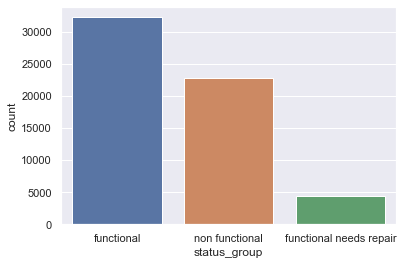

In [17]:
# Investigating the distribuiton of Target varialbe
print (raw_all['status_group'].value_counts())
sns.countplot(x = 'status_group', data = raw_all)

#### Observtions on the target varialble: 
We can see the imbalance of classes above (54%, 38%, 7% respectively). The goal is to be able to classify (and then predict) those water points that are in need of repair/replacement. So the second 2 classes are more important. I plan to code the classes as follows: 
* functional = 0
* non_functional = 1
* functional_needs_repair = 2

It is not clear to me, how important the "functional needs repair" class is. Identifying these may be less important than having a high ability to identify those not working at all (due to limited resources). 
Q: To what degree does adding to the minority class, affect the predictability of the majority class(es)?
Idea: might also explore turning the target variable into a binary class (works / doesnt) or (needs attention / doesnt)

**Accuracy** is important (especially for identifying class 1), so for class 1 (non_functional) is our TP

**False Positives**... this is where we say it is non-functional when it IS working. So we risk sending a repair crew somewhere they do not need to go (loss of time and money).

**False Negatives**... this is when we say it is functional when in fact it is NOT. This is the greater risk, as it means that a water_source will be delayed in repair or will go un-fixed resulting in lack of water or reliance on poor water quality from other sources. So we want to minimize these. 

Therefore, I will also focus on the metric of **Recall** (TP/TP+FN)... which is a metric more sensitive to false negatives. 

Note that in looking at confusion matrices and metrics per class... and associated FN (that the 0 class will be of greater risk/more important than the 2 class...as a water point in need of repair will still get attention (assuming they are both prioritized the same way).

### Initial Data Visualization - looking for relationships and patterns

In [ ]:
# First take a look to see what variables I may want to cut. 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25cecc18>,
      dtype=object)

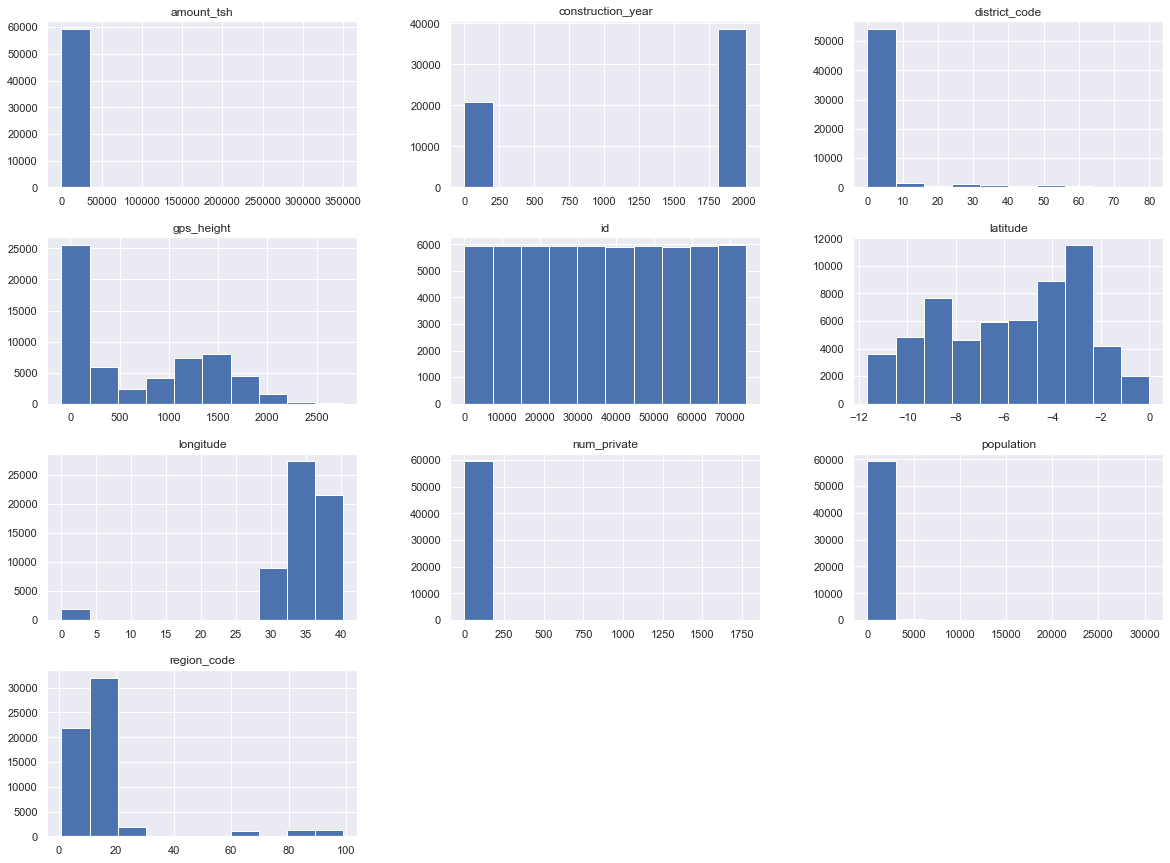

In [18]:
raw_all.hist(figsize=(20,15))

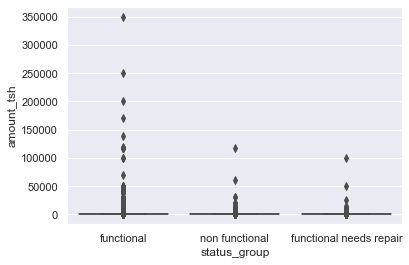

In [315]:
ax = sns.boxplot(x="status_group", y="amount_tsh", data=raw_all)

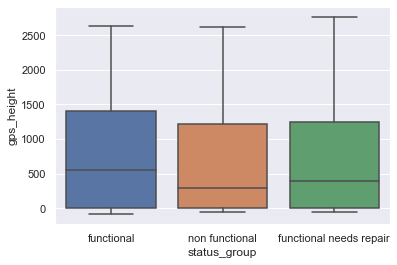

In [316]:
ax = sns.boxplot(x="status_group", y="gps_height", data=raw_all)

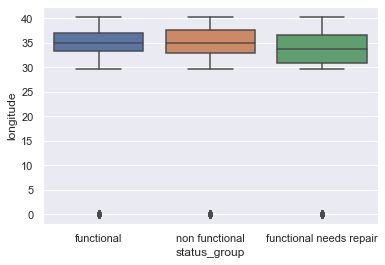

In [317]:
ax = sns.boxplot(x="status_group", y="longitude", data=raw_all)

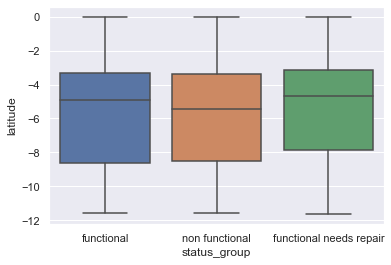

In [318]:
ax = sns.boxplot(x="status_group", y="latitude", data=raw_all)

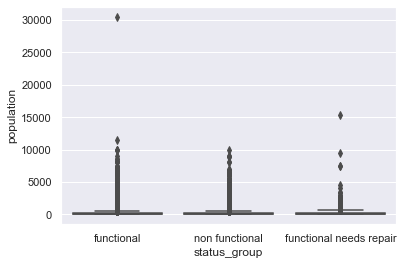

In [319]:
ax = sns.boxplot(x="status_group", y="population", data=raw_all)

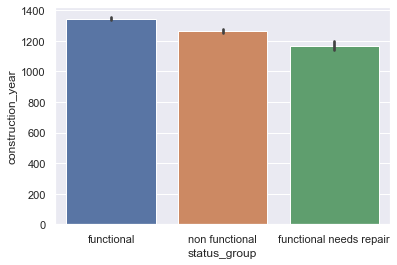

In [257]:
ax = sns.barplot(x="status_group", y="construction_year", data=raw_all)

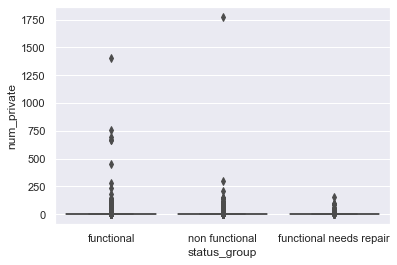

In [322]:
ax = sns.boxplot(x="status_group", y="num_private", data=raw_all)

In [279]:
raw_all.shape

(59400, 41)

In [283]:
raw_cut7.shape

(35303, 17)

In [ ]:
# Plot the main categorical variables by status_group to look for differences between classes

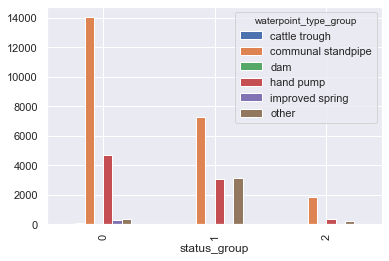

In [286]:
pd.crosstab(raw_cut7['status_group'],raw_cut7['waterpoint_type_group']).plot.bar()

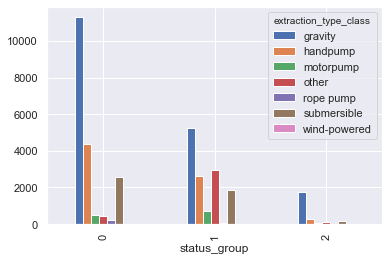

In [287]:
pd.crosstab(raw_cut7['status_group'],raw_cut7['extraction_type_class']).plot.bar()

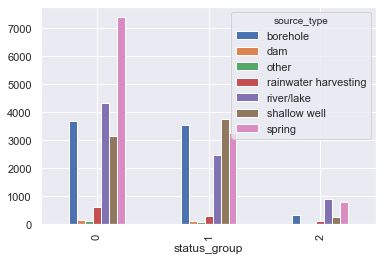

In [288]:
pd.crosstab(raw_cut7['status_group'],raw_cut7['source_type']).plot.bar()

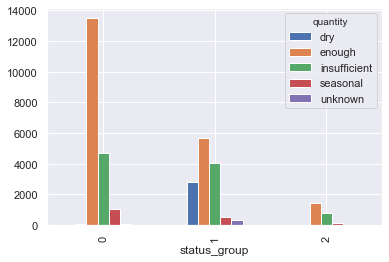

In [289]:
pd.crosstab(raw_cut7['status_group'],raw_cut7['quantity']).plot.bar()

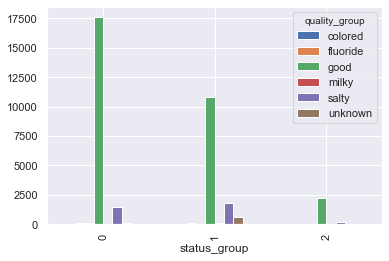

In [290]:
pd.crosstab(raw_cut7['status_group'],raw_cut7['quality_group']).plot.bar()

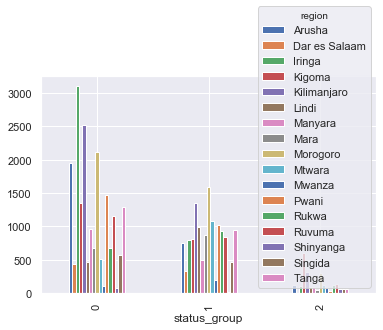

In [291]:
pd.crosstab(raw_cut7['status_group'],raw_cut7['region']).plot.bar()

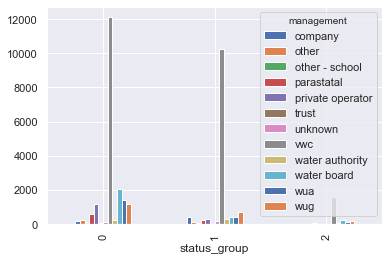

In [292]:
pd.crosstab(raw_cut7['status_group'],raw_cut7['management']).plot.bar()

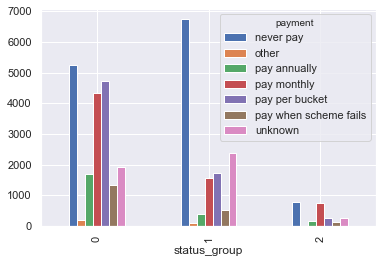

In [293]:
pd.crosstab(raw_cut7['status_group'],raw_cut7['payment']).plot.bar()

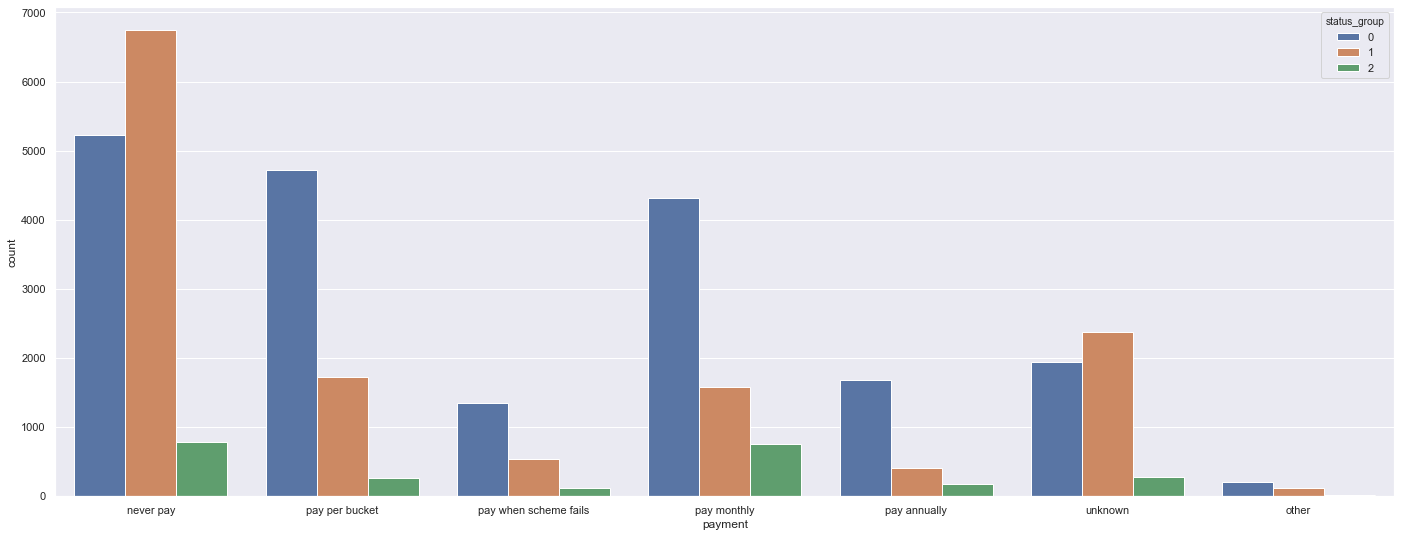

In [311]:
plt.figure(figsize=(24, 9))
sns.countplot(data=raw_cut7,x='payment',hue='status_group')

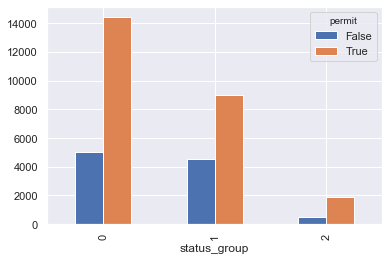

In [294]:
pd.crosstab(raw_cut7['status_group'],raw_cut7['permit']).plot.bar()

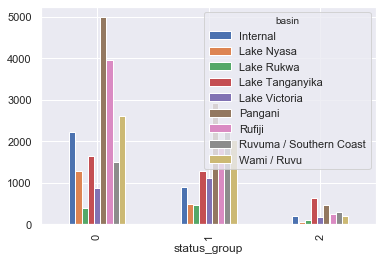

In [297]:
pd.crosstab(raw_cut7['status_group'],raw_cut7['basin']).plot.bar()

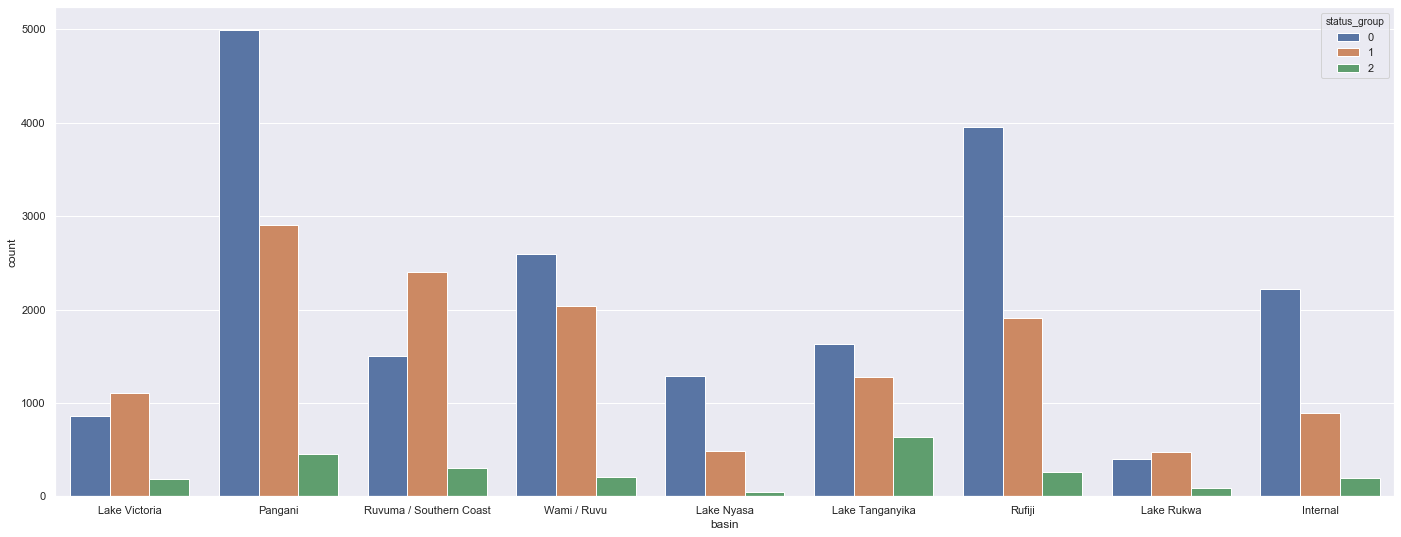

In [310]:
plt.figure(figsize=(24, 9))
sns.countplot(data=raw_cut7,x='basin',hue='status_group')

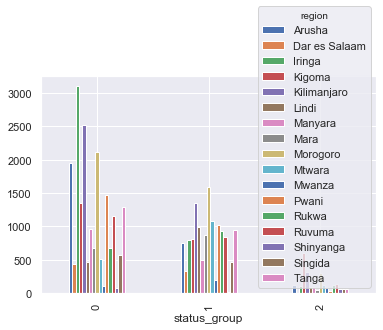

In [298]:
pd.crosstab(raw_cut7['status_group'],raw_cut7['region']).plot.bar()

#### Observtions on visualization / EDA: 
Concerned with outliers...at the high end according to some boxplots. 
Some variables have large number of 0 values. In some cases we can tell these are not good values - like construciton_year. But for others we are not sure if they are reasonalbe or not - like amount_tsh. 
Some variables have fairly large "other" or "unsure" classes. 

### Additional EDA
Adding on some more visualizations after doing some modeling. 

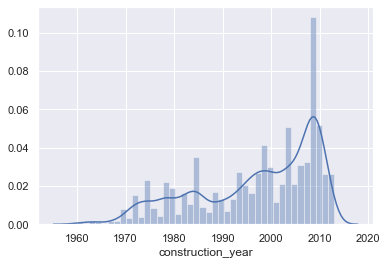

In [260]:
# combined histogram and kde plot - and looking at each by target class to spot any visible differences. 
sns.distplot(data_reduced['construction_year'])

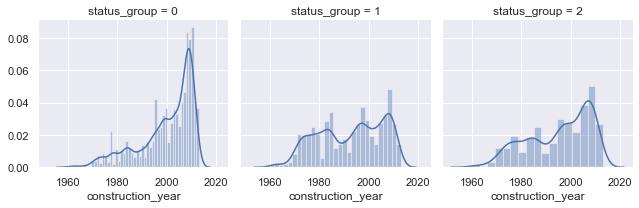

In [277]:
g = sns.FacetGrid(data_reduced, col="status_group")
g.map(sns.distplot, "construction_year")

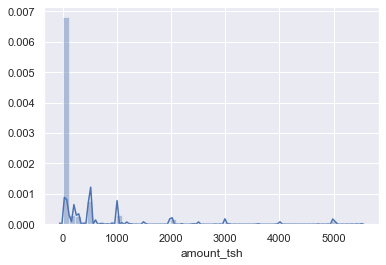

In [261]:
sns.distplot(data_reduced['amount_tsh'])

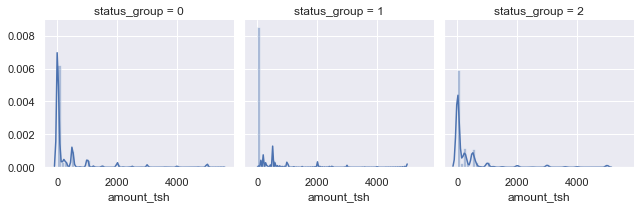

In [276]:
g = sns.FacetGrid(data_reduced, col="status_group")
g.map(sns.distplot, "amount_tsh")

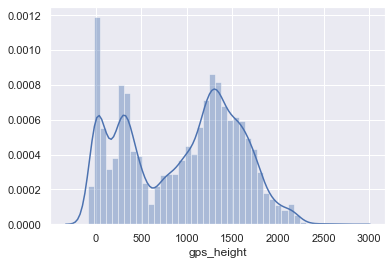

In [262]:
sns.distplot(data_reduced['gps_height'])

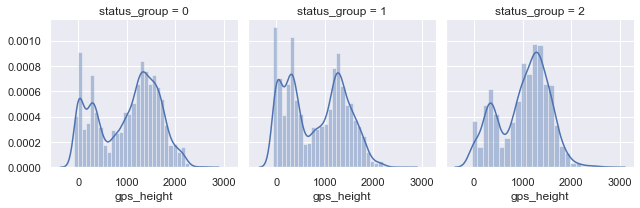

In [275]:
g = sns.FacetGrid(data_reduced, col="status_group")
g.map(sns.distplot, "gps_height")

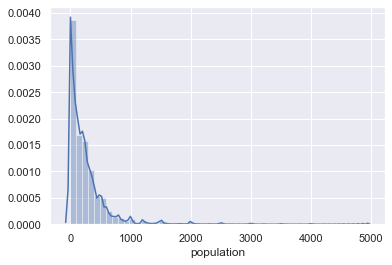

In [263]:
sns.distplot(data_reduced['population'])

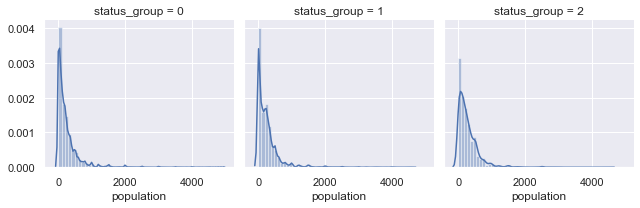

In [274]:
g = sns.FacetGrid(data_reduced, col="status_group")
g.map(sns.distplot, "population")

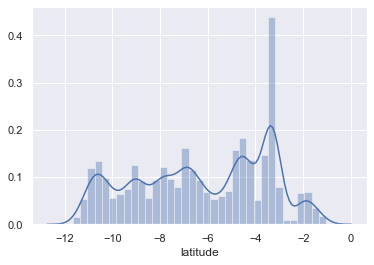

In [264]:
sns.distplot(data_reduced['latitude'])

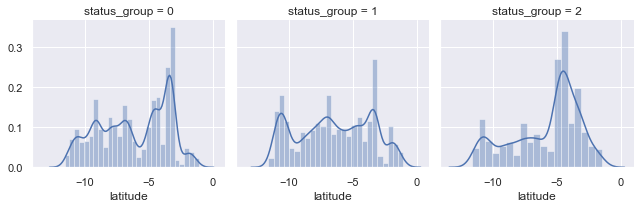

In [272]:
g = sns.FacetGrid(data_reduced, col="status_group")
g.map(sns.distplot, "latitude")

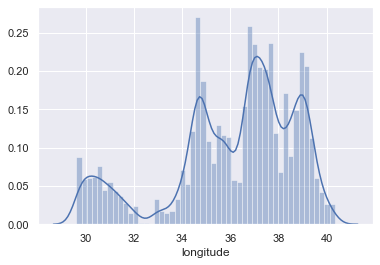

In [265]:
sns.distplot(data_reduced['longitude'])

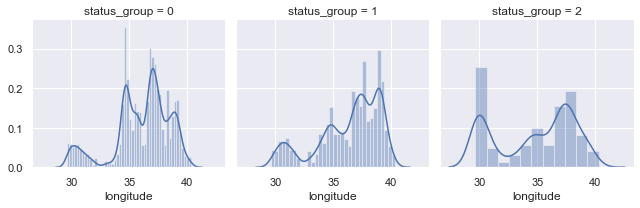

In [273]:
g = sns.FacetGrid(data_reduced, col="status_group")
g.map(sns.distplot, "longitude")

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  """),


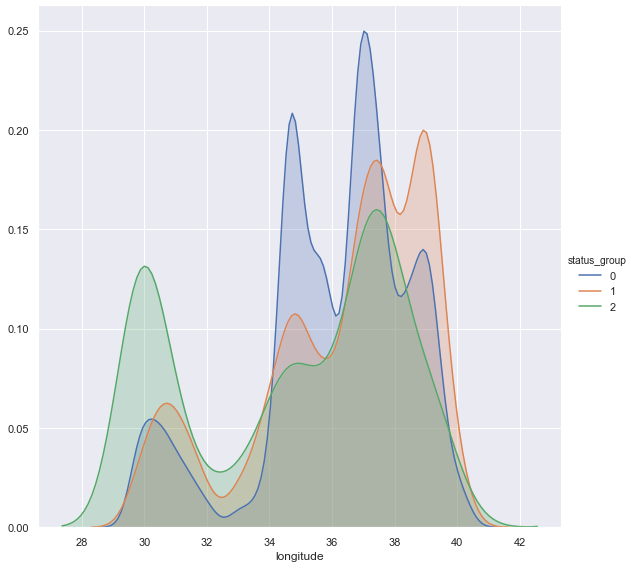

In [307]:
(sns
  .FacetGrid(data_reduced, 
             hue='status_group',size=8)
  .map(sns.kdeplot, 'longitude', shade=True)
 .add_legend()
)

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  """),


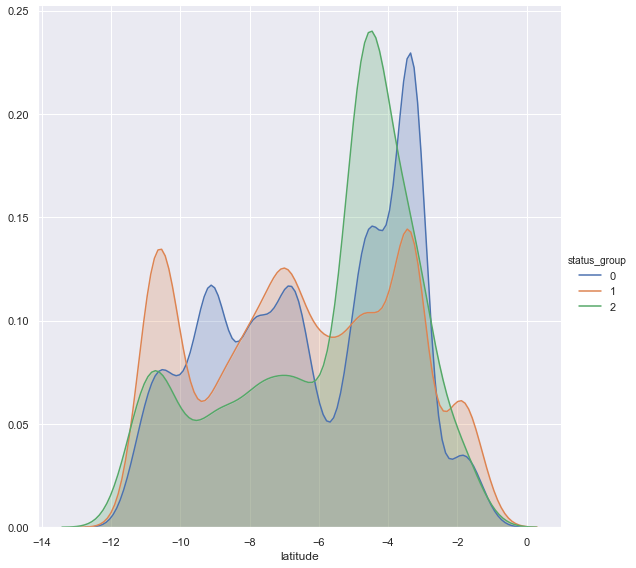

In [306]:
(sns
  .FacetGrid(data_reduced, 
             hue='status_group',size=8)
  .map(sns.kdeplot, 'latitude', shade=True)
 .add_legend()
)

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  """),


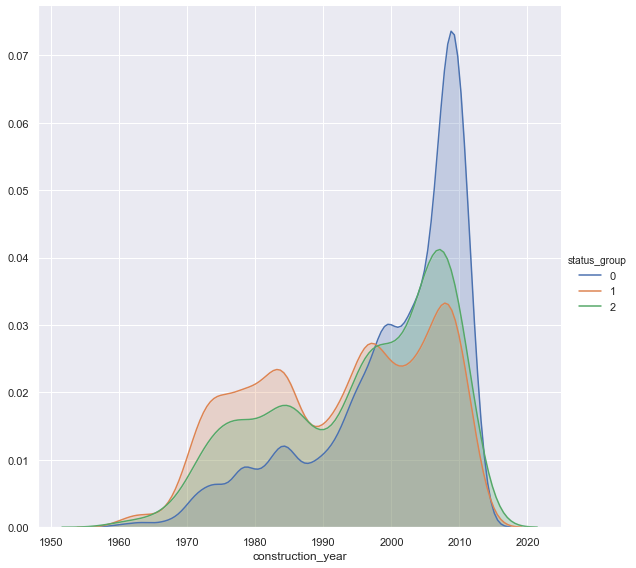

In [308]:
(sns
  .FacetGrid(data_reduced, 
             hue='status_group',size=8)
  .map(sns.kdeplot, 'construction_year', shade=True)
 .add_legend()
)

In [309]:
# Verifying the range of construction dates.
print(data_reduced.construction_year.max())
print(data_reduced.construction_year.min())

2013
1960


In [313]:
# Taking a closer look at how the similar categorical variables map to each other. 
print(raw_all.groupby(['extraction_type_class','extraction_type_group','extraction_type']).size())

extraction_type_class  extraction_type_group  extraction_type          
gravity                gravity                gravity                      26780
handpump               afridev                afridev                       1770
                       india mark ii          india mark ii                 2400
                       india mark iii         india mark iii                  98
                       nira/tanira            nira/tanira                   8154
                       other handpump         other - mkulima/shinyanga        2
                                              other - play pump               85
                                              other - swn 81                 229
                                              walimi                          48
                       swn 80                 swn 80                        3670
motorpump              mono                   mono                          2865
                       other motorpum

### Initial Data Cleaning and Munging

In [19]:
raw_all.shape

(59400, 41)

In [20]:
# Cutting down the columns
columns_to_cut = ['date_recorded', 'funder', 'installer', 'wpt_name', 'subvillage', 'region_code','district_code', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'extraction_type', 'extraction_type_group', 'management_group', 'payment_type', 'water_quality','quantity_group', 'source', 'source_class', 'waterpoint_type']
raw_cut = raw_all.drop(columns_to_cut, axis=1)

In [21]:
raw_cut.shape

(59400, 19)

In [22]:
raw_cut.groupby(["status_group", "permit"]).count()

id  amount_tsh  gps_height  longitude  \
status_group            permit                                             
functional              False    9045        9045        9045       9045   
                        True    21541       21541       21541      21541   
functional needs repair False    1320        1320        1320       1320   
                        True     2697        2697        2697       2697   
non functional          False    7127        7127        7127       7127   
                        True    14614       14614       14614      14614   

                                latitude  num_private  basin  region  \
status_group            permit                                         
functional              False       9045         9045   9045    9045   
                        True       21541        21541  21541   21541   
functional needs repair False       1320         1320   1320    1320   
                        True        2697         2697   2697    2697   
non functional          False       7127         7127   7127    7127   
                        True       14614        14614  14614   14614   

                                population  construction_year  \
status_group            permit                                  
functional              False         9045               9045   
                        True         21541              21541   
functional needs repair False         1320               1320   
                        True          2697               2697   
non functional          False         7127               7127   
                        True         14614              14614   

                                extraction_type_class  management  payment  \
status_group            permit                                               
functional              False                    9045        9045     9045   
                        True                    21541       21541    21541   
functional needs repair False                    1320        1320     1320   
                        True                     2697        2697     2697   
non functional          False                    7127        7127     7127   
                        True                    14614       14614    14614   

                                quality_group  quantity  source_type  \
status_group            permit                                         
functional              False            9045      9045         9045   
                        True            21541     21541        21541   
functional needs repair False            1320      1320         1320   
                        True             2697      2697         2697   
non functional          False            7127      7127         7127   
                        True            14614     14614        14614   

                                waterpoint_type_group  
status_group            permit                         
functional              False                    9045  
                        True                    21541  
functional needs repair False                    1320  
                        True                     2697  
non functional          False                    7127  
                        True                    14614

In [23]:
# Cut the null values (rows) represented in permit column
raw_cut.dropna(inplace=True)

In [24]:
raw_cut.isnull().sum()

id                       0
amount_tsh               0
gps_height               0
longitude                0
latitude                 0
num_private              0
basin                    0
region                   0
population               0
permit                   0
construction_year        0
extraction_type_class    0
management               0
payment                  0
quality_group            0
quantity                 0
source_type              0
waterpoint_type_group    0
status_group             0
dtype: int64

In [25]:
raw_cut.shape

(56344, 19)

In [26]:
# Change target values from text to numeric (0,1,2)
raw_cut2 = raw_cut.replace({'status_group': {'functional' : 0, 'non functional' : 1, 'functional needs repair' : 2}})
# Check to see that it worked
raw_cut2.iloc[15:20]

,id,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,population,permit,construction_year,extraction_type_class,management,payment,quality_group,quantity,source_type,waterpoint_type_group,status_group
15,61848,0.0,1645,31.444121,-8.274962,0,Lake Tanganyika,Rukwa,200,False,1991,handpump,vwc,never pay,good,enough,borehole,hand pump,0
16,48451,500.0,1703,34.642439,-9.106185,0,Rufiji,Iringa,35,True,1978,gravity,wua,pay monthly,good,dry,river/lake,communal standpipe,1
17,58155,0.0,1656,34.569266,-9.085515,0,Rufiji,Iringa,50,True,1978,gravity,wua,pay when scheme fails,good,dry,river/lake,communal standpipe,1
18,34169,0.0,1162,32.920154,-1.947868,0,Lake Victoria,Mwanza,1000,True,1999,other,vwc,never pay,milky,insufficient,spring,other,2
19,18274,500.0,1763,34.508967,-9.894412,0,Lake Nyasa,Iringa,1,True,1992,gravity,vwc,pay annually,good,enough,spring,communal standpipe,0


In [27]:
# Examine classes within each feature (try an alternative approach...not just numerical)
for column in raw_cut2:
    unique_values = raw_cut2[column].value_counts()
    nr_values = len(unique_values)
    if nr_values <= 15:
        print("values for {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("values for {} is: {}".format(column, nr_values))


values for id is: 56344
values for amount_tsh is: 95
values for gps_height is: 2426
values for longitude is: 54484
values for latitude is: 54486
values for num_private is: 64
values for basin is: 9 -- Lake Victoria              9881
Pangani                    8678
Rufiji                     7966
Internal                   6504
Lake Tanganyika            6432
Wami / Ruvu                5959
Ruvuma / Southern Coast    4492
Lake Nyasa                 3978
Lake Rukwa                 2454
Name: basin, dtype: int64
values for region is: 21
values for population is: 1029
values for permit is: 2 -- True     38852
False    17492
Name: permit, dtype: int64
values for construction_year is: 55
values for extraction_type_class is: 7 -- gravity         25234
handpump        16048
other            6050
submersible      5854
motorpump        2704
rope pump         349
wind-powered      105
Name: extraction_type_class, dtype: int64
values for management is: 12 -- vwc                 38296
wug          

In [35]:
raw_cut4['construction_year'].value_counts()

0       17761
2008     2576
2009     2491
2010     2430
2000     1566
2007     1559
2006     1447
2003     1276
2011     1211
2004     1109
2002     1065
1978     1027
2012     1026
2005      985
1995      979
1999      954
1985      943
1998      924
1984      779
1996      768
1982      741
1972      705
1994      703
1974      676
1990      667
1980      647
1992      632
1997      613
1993      595
2001      533
1988      521
1983      487
1975      437
1986      433
1976      411
1991      323
1989      316
1970      310
1987      301
1981      238
1977      199
1979      192
1973      183
2013      173
1971      145
1967       86
1963       85
1968       68
1969       59
1960       45
1964       40
1962       29
1961       20
1965       19
1966       17
Name: construction_year, dtype: int64

In [ ]:
# Looking at potential outliers... and a difficult situation. Seeing lots of 0 values, and in some cases these could be valid data, 
# ...but in other cases it could indicate missing data. In some cases the zeros are numerous - representing almost half or more of the data.
# ...so will need to approach carefully. First will be just a light touch. 

In [ ]:
desc_df = raw_cut4.describe()
desc_df.loc['+2_std'] = desc_df.loc['mean'] + (desc_df.loc['std']*2)
desc_df.loc['-2_std'] = desc_df.loc['mean'] - (desc_df.loc['std']*2)
desc_df

In [29]:
raw_cut3 = raw_cut2.loc[raw_cut2['longitude'] < 28]

In [30]:
raw_cut3.shape

(1812, 19)

In [31]:
raw_cut2.shape

(56344, 19)

In [32]:
raw_cut4 = raw_cut2.loc[raw_cut2['longitude'] > 28]
raw_cut4.shape

(54532, 19)

In [33]:
raw_cut4 = raw_cut4.loc[raw_cut4['latitude'] < -1]
raw_cut4.shape

(54525, 19)

In [34]:
raw_cut4.loc[raw_cut4['construction_year'] > 1960].mean()

id                   37102.965168
amount_tsh             471.943502
gps_height             982.352406
longitude               36.012402
latitude                -6.359948
num_private              0.739236
population             269.215583
permit                   0.717176
construction_year     1996.931670
status_group             0.501185
dtype: float64

In [36]:
# Will change values for construction_year = 0 to the mean of 1997. 
raw_cut4 = raw_cut4.replace({'construction_year': {0 : 1997}})
# Check to see that it worked
raw_cut4['construction_year'].value_counts()

1997    18374
2008     2576
2009     2491
2010     2430
2000     1566
2007     1559
2006     1447
2003     1276
2011     1211
2004     1109
2002     1065
1978     1027
2012     1026
2005      985
1995      979
1999      954
1985      943
1998      924
1984      779
1996      768
1982      741
1972      705
1994      703
1974      676
1990      667
1980      647
1992      632
1993      595
2001      533
1988      521
1983      487
1975      437
1986      433
1976      411
1991      323
1989      316
1970      310
1987      301
1981      238
1977      199
1979      192
1973      183
2013      173
1971      145
1967       86
1963       85
1968       68
1969       59
1960       45
1964       40
1962       29
1961       20
1965       19
1966       17
Name: construction_year, dtype: int64

In [37]:
raw_cut4['population'].value_counts()

0       18453
1        6126
150      1857
200      1824
250      1611
        ...  
1685        1
1960        1
2248        1
821         1
1439        1
Name: population, Length: 1029, dtype: int64

In [38]:
# cutting outliers (high-end) for population
raw_cut4 = raw_cut4.loc[raw_cut4['population'] < 5000]
raw_cut4.shape

(54412, 19)

In [39]:
# cutting outliers (high-end) for amount_tsh (based on > +2 SD)
raw_cut4 = raw_cut4.loc[raw_cut4['amount_tsh'] < 6000]
raw_cut4.shape

(53957, 19)

In [40]:
raw_cut4['num_private'].value_counts()

0       53213
6          81
1          71
5          46
8          46
        ...  
280         1
141         1
1776        1
62          1
94          1
Name: num_private, Length: 64, dtype: int64

In [41]:
raw_cut4 = raw_cut4.loc[raw_cut4['num_private'] < 27]
raw_cut4.shape

(53675, 19)

In [42]:
raw_cut4['population'].value_counts()

0       18372
1        5966
150      1806
200      1805
250      1601
        ...  
3832        1
171         1
1177        1
985         1
1439        1
Name: population, Length: 991, dtype: int64

In [43]:
raw_cut6 = raw_cut4.loc[raw_cut4['population'] > 0]
raw_cut6.shape

(35303, 19)

In [44]:
# Cutting down the columns a bit more
columns_to_cut = ['id', 'num_private']
raw_cut7 = raw_cut6.drop(columns_to_cut, axis=1)
raw_cut7.shape

(35303, 17)

In [45]:
desc_df = raw_cut7.describe()
desc_df.loc['+2_std'] = desc_df.loc['mean'] + (desc_df.loc['std']*2)
desc_df.loc['-2_std'] = desc_df.loc['mean'] - (desc_df.loc['std']*2)
desc_df

,amount_tsh,gps_height,longitude,latitude,population,construction_year,status_group
count,35303.000000,35303.000000,35303.000000,35303.000000,35303.000000,35303.000000,35303.000000
mean,276.985379,947.277852,36.092648,-6.266889,261.666119,1996.904852,0.516670
std,765.027638,615.139355,2.644748,2.752140,397.116563,12.410677,0.619951
min,0.000000,-90.000000,29.607122,-11.649440,1.000000,1960.000000,0.000000
25%,0.000000,334.000000,34.710603,-8.665277,45.000000,1987.000000,0.000000
50%,0.000000,1081.000000,36.796781,-6.204190,150.000000,2000.000000,0.000000
75%,200.000000,1437.000000,37.998958,-3.645873,321.000000,2008.000000,1.000000
max,5500.000000,2770.000000,40.345193,-1.042375,4900.000000,2013.000000,2.000000
+2_std,1807.040656,2177.556561,41.382144,-0.762609,1055.899245,2021.726207,1.756572
-2_std,-1253.069897,-283.000857,30.803152,-11.771168,-532.567007,1972.083498,-0.723232


In [46]:
raw_cut7['gps_height'].value_counts()

 0       722
-15       59
-13       54
-16       54
-14       51
        ... 
 2269      1
 2301      1
-53        1
 2576      1
 2155      1
Name: gps_height, Length: 2323, dtype: int64

In [47]:
raw_cut7['amount_tsh'].value_counts()
# Although there are still a large number of 0 values for this category, they may be real values. Might come back and try changing later?

0.0       19530
500.0      2991
50.0       2253
20.0       1396
1000.0     1207
          ...  
306.0         1
5400.0        1
1400.0        1
12.0          1
900.0         1
Name: amount_tsh, Length: 61, dtype: int64

In [48]:
raw_cut7['source_type'].value_counts()

spring                  11444
river/lake               7697
borehole                 7531
shallow well             7168
rainwater harvesting     1026
dam                       254
other                     183
Name: source_type, dtype: int64

0    0.550633
1    0.382064
2    0.067303
Name: status_group, dtype: float64


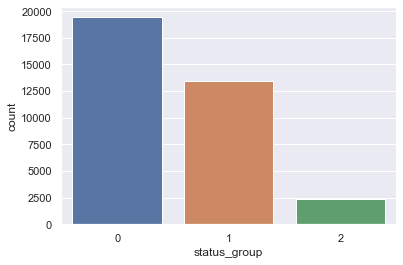

In [49]:
# Investigating the distribuiton of Target varialbe
print (raw_cut7['status_group'].value_counts(normalize=True))
sns.countplot(x = 'status_group', data = raw_cut7)
# Looks like through the editing, the proportion has stayed about the same. 

In [50]:
raw_cut7.head()

,amount_tsh,gps_height,longitude,latitude,basin,region,population,permit,construction_year,extraction_type_class,management,payment,quality_group,quantity,source_type,waterpoint_type_group,status_group
1,0.0,1399,34.698766,-2.147466,Lake Victoria,Mara,280,True,2010,gravity,wug,never pay,good,insufficient,rainwater harvesting,communal standpipe,0
2,25.0,686,37.460664,-3.821329,Pangani,Manyara,250,True,2009,gravity,vwc,pay per bucket,good,enough,dam,communal standpipe,0
3,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58,True,1986,submersible,vwc,never pay,good,dry,borehole,communal standpipe,1
5,20.0,0,39.172796,-4.765587,Pangani,Tanga,1,True,2009,submersible,vwc,pay per bucket,salty,enough,other,communal standpipe,0
10,0.0,62,39.209518,-7.034139,Wami / Ruvu,Pwani,345,False,2011,submersible,private operator,never pay,salty,enough,borehole,other,0


In [51]:
raw_cut7.shape

(35303, 17)

In [52]:
# Examine classes within each feature (try an alternative approach...not just numerical)
for column in raw_cut7:
    unique_values = raw_cut7[column].value_counts(normalize=True)
    nr_values = len(unique_values)
    if nr_values <= 13:
        print("values for {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("values for {} is: {}".format(column, nr_values))

values for amount_tsh is: 61
values for gps_height is: 2323
values for longitude is: 35279
values for latitude is: 35280
values for basin is: 9 -- Pangani                    0.236467
Rufiji                     0.173300
Wami / Ruvu                0.136872
Ruvuma / Southern Coast    0.119395
Lake Tanganyika            0.100445
Internal                   0.093873
Lake Victoria              0.060873
Lake Nyasa                 0.051554
Lake Rukwa                 0.027221
Name: basin, dtype: float64
values for region is: 17
values for population is: 990
values for permit is: 2 -- True     0.715973
False    0.284027
Name: permit, dtype: float64
values for construction_year is: 54
values for extraction_type_class is: 7 -- gravity         0.517350
handpump        0.207319
submersible     0.131717
other           0.098887
motorpump       0.035209
rope pump       0.008073
wind-powered    0.001445
Name: extraction_type_class, dtype: float64
values for management is: 12 -- vwc                 0.680

In [ ]:
# save this edited df as csv file for later use
raw_cut7.to_csv(r'dfA.csv')

In [281]:
raw_cut7.shape

(35303, 17)

In [53]:
# Time to split take categorical variables and do some one-hot encoding.
categorical_variables = raw_cut7[['basin', 'region', 'management', 'payment', 'quantity','quality_group', 'source_type', 'extraction_type_class', 'waterpoint_type_group']]
categorical_dummies = pd.get_dummies(categorical_variables, drop_first=True)
categorical_dummies.head()

,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Dar es Salaam,region_Iringa,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tanga,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,payment_other,payment_pay annually,payment_pay monthly,payment_pay per bucket,payment_pay when scheme fails,payment_unknown,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [54]:
categorical_dummies.shape

(35303, 67)

In [55]:
categorical_dummies.columns = categorical_dummies.columns.str.replace(' ','')

In [56]:
categorical_dummies.columns = categorical_dummies.columns.str.replace('-','_')

In [57]:
categorical_dummies.columns = categorical_dummies.columns.str.replace('/','_')

In [58]:
categorical_dummies.head()

,basin_LakeNyasa,basin_LakeRukwa,basin_LakeTanganyika,basin_LakeVictoria,basin_Pangani,basin_Rufiji,basin_Ruvuma_SouthernCoast,basin_Wami_Ruvu,region_DaresSalaam,region_Iringa,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tanga,management_other,management_other_school,management_parastatal,management_privateoperator,management_trust,management_unknown,management_vwc,management_waterauthority,management_waterboard,management_wua,management_wug,payment_other,payment_payannually,payment_paymonthly,payment_payperbucket,payment_paywhenschemefails,payment_unknown,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,source_type_dam,source_type_other,source_type_rainwaterharvesting,source_type_river_lake,source_type_shallowwell,source_type_spring,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_ropepump,extraction_type_class_submersible,extraction_type_class_wind_powered,waterpoint_type_group_communalstandpipe,waterpoint_type_group_dam,waterpoint_type_group_handpump,waterpoint_type_group_improvedspring,waterpoint_type_group_other
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [59]:
raw_cut8 = raw_cut7.drop(['basin', 'region', 'management', 'payment', 'quantity','quality_group', 'source_type', 'extraction_type_class', 'waterpoint_type_group'], axis=1)
print(raw_cut8.shape)
raw_cut8.head()

(35303, 8)


,amount_tsh,gps_height,longitude,latitude,population,permit,construction_year,status_group
1,0.0,1399,34.698766,-2.147466,280,True,2010,0
2,25.0,686,37.460664,-3.821329,250,True,2009,0
3,0.0,263,38.486161,-11.155298,58,True,1986,1
5,20.0,0,39.172796,-4.765587,1,True,2009,0
10,0.0,62,39.209518,-7.034139,345,False,2011,0


In [60]:
data_reduced = pd.concat([raw_cut8, categorical_dummies], axis=1)
print(data_reduced.shape)
data_reduced.head()

(35303, 75)


,amount_tsh,gps_height,longitude,latitude,population,permit,construction_year,status_group,basin_LakeNyasa,basin_LakeRukwa,basin_LakeTanganyika,basin_LakeVictoria,basin_Pangani,basin_Rufiji,basin_Ruvuma_SouthernCoast,basin_Wami_Ruvu,region_DaresSalaam,region_Iringa,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tanga,management_other,management_other_school,management_parastatal,management_privateoperator,management_trust,management_unknown,management_vwc,management_waterauthority,management_waterboard,management_wua,management_wug,payment_other,payment_payannually,payment_paymonthly,payment_payperbucket,payment_paywhenschemefails,payment_unknown,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,source_type_dam,source_type_other,source_type_rainwaterharvesting,source_type_river_lake,source_type_shallowwell,source_type_spring,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_ropepump,extraction_type_class_submersible,extraction_type_class_wind_powered,waterpoint_type_group_communalstandpipe,waterpoint_type_group_dam,waterpoint_type_group_handpump,waterpoint_type_group_improvedspring,waterpoint_type_group_other
1,0.0,1399,34.698766,-2.147466,280,True,2010,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,25.0,686,37.460664,-3.821329,250,True,2009,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.0,263,38.486161,-11.155298,58,True,1986,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5,20.0,0,39.172796,-4.765587,1,True,2009,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
10,0.0,62,39.209518,-7.034139,345,False,2011,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [70]:
# Change permit values from text to numeric (0,1)
# data_reduced2 = data_reduced.replace({'permit': {'False': 0, 'True': 1}})
data_reduced['permit'] = data_reduced['permit'].map({False:0, True:1})
# Check to see that it worked
data_reduced.head()

,amount_tsh,gps_height,longitude,latitude,population,permit,construction_year,status_group,basin_LakeNyasa,basin_LakeRukwa,basin_LakeTanganyika,basin_LakeVictoria,basin_Pangani,basin_Rufiji,basin_Ruvuma_SouthernCoast,basin_Wami_Ruvu,region_DaresSalaam,region_Iringa,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tanga,management_other,management_other_school,management_parastatal,management_privateoperator,management_trust,management_unknown,management_vwc,management_waterauthority,management_waterboard,management_wua,management_wug,payment_other,payment_payannually,payment_paymonthly,payment_payperbucket,payment_paywhenschemefails,payment_unknown,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,source_type_dam,source_type_other,source_type_rainwaterharvesting,source_type_river_lake,source_type_shallowwell,source_type_spring,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_ropepump,extraction_type_class_submersible,extraction_type_class_wind_powered,waterpoint_type_group_communalstandpipe,waterpoint_type_group_dam,waterpoint_type_group_handpump,waterpoint_type_group_improvedspring,waterpoint_type_group_other
1,0.0,1399,34.698766,-2.147466,280,1,2010,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,25.0,686,37.460664,-3.821329,250,1,2009,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.0,263,38.486161,-11.155298,58,1,1986,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5,20.0,0,39.172796,-4.765587,1,1,2009,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
10,0.0,62,39.209518,-7.034139,345,0,2011,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


#### Split out data for modeling

In [71]:
# Need to split data into X and y dataframes.
y = data_reduced['status_group']
X = data_reduced.drop(columns=['status_group'], axis=1)
print(y.shape)
print(X.shape)

(35303,)
(35303, 74)


In [72]:
# Create train and test sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(26477, 74)
(8826, 74)
(26477,)
(8826,)


## Initial Modeling

Models I plan to try: 
* KNN
* Decision Trees
* Random Forest
* XGBoost

Want to look into feature importance and hopefully do some tuning via the results of this.

### Model 1: XGBoost
Starting wiht this as it requires no scaling. Hope that it does not take too long to run. 

In [125]:
# Import libraries needed
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [126]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

In [127]:
# Get results
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Test Accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 75.69%
Test Accuracy: 75.23%


In [128]:
# Get detailed results for train and test
# Classification Report
print('--------------------------------------------------------------------------')
print('MODEL = XGBoost')
print('\nClassification Report - TRAIN')
print('--------------------------------------------------------------------------')
print(classification_report(y_train, training_preds))
print('--------------------------------------------------------------------------')
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TRAIN')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_train, training_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')
print('--------------------------------------------------------------------------')
# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TEST')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, test_preds))
print('--------------------------------------------------------------------------')
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TEST')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
MODEL = XGBoost

Classification Report - TRAIN
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.90      0.81     14587
           1       0.80      0.66      0.72     10086
           2       0.62      0.12      0.20      1804

    accuracy                           0.76     26477
   macro avg       0.72      0.56      0.58     26477
weighted avg       0.75      0.76      0.74     26477

--------------------------------------------------------------------------
--------------------------------------------------------------------------
Confusion Matrix - TRAIN
--------------------------------------------------------------------------
Predicted      0     1    2    All
True                              
0          13171  1330   86  14587
1           3389  6654   43  10086
2           1238   351  215   18

### OBSERVATIONS on Model 1: XGBoost
So a reasonable accuracy score of 0.75, and it appears no overfitting occured as train and test accuracy were both 75%. For class 1, recall was on the low side - of 0.66 and in the confusion matrix we can see that there are a large number of false negatives for the 0 class (1127). Note also that the total number of test samples for class 2 is just 572 (in test set) so would be good to generate more samples of this class with SMOTE (or similar).

In [129]:
# MODEL 1B: with SMOTE training data
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE

In [130]:
# Address the target class imbalance with SMOTE

print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train == 2)))

sm = SMOTE(random_state = 2) 
X_train_resb, y_train_resb = sm.fit_sample(X_train, y_train) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_resb.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_resb.shape)) 

print("After OverSampling, counts of label '0': {}".format(sum(y_train_resb == 0))) 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_resb == 1))) 
print("After OverSampling, counts of label '2': {}".format(sum(y_train_resb == 2)))

Before OverSampling, counts of label '0': 14587
Before OverSampling, counts of label '1': 10086
Before OverSampling, counts of label '2': 1804 

After OverSampling, the shape of train_X: (43761, 74)
After OverSampling, the shape of train_y: (43761,) 

After OverSampling, counts of label '0': 14587
After OverSampling, counts of label '1': 14587
After OverSampling, counts of label '2': 14587


In [131]:
# Instantiate KNeighborsClassifier
clf_res = XGBClassifier()
# Fit the classifier
clf_res.fit(X_train_resb, y_train_resb)

XGBClassifier(objective='multi:softprob')

In [132]:
# Make predictions for test data
# y_pred = clf_res.predict(scaled_test)

# Predict on training and test sets
training_preds = clf_res.predict(X_train_resb)
test_preds = clf_res.predict(X_test)

In [133]:
# Get results
training_accuracy = accuracy_score(y_train_resb, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Test Accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 73.25%
Test Accuracy: 71.84%


In [134]:
# Get detailed results (Train and Test)

# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TRAIN')
print('--------------------------------------------------------------------------')
print(classification_report(y_train_resb, training_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TRAIN')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_train_resb, training_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('\n--------------------------------------------------------------------------')
# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TEST')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, test_preds))

# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TEST')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Classification Report - TRAIN
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     14587
           1       0.74      0.63      0.68     14587
           2       0.75      0.78      0.76     14587

    accuracy                           0.73     43761
   macro avg       0.73      0.73      0.73     43761
weighted avg       0.73      0.73      0.73     43761

--------------------------------------------------------------------------
Confusion Matrix - TRAIN
--------------------------------------------------------------------------
Predicted      0      1      2    All
True                                 
0          11585   1622   1380  14587
1           2978   9135   2474  14587
2           1712   1542  11333  14587
All        16275  12299  15187  43761

-----------------------------------

### OBSERVATIONS on Model 1B: XGBoost w/ SMOTE
Suprising that with SMOTE, the accuracy actually went down (from 0.75 to 0.73). It appears no overfitting occured as train and test accuracy were only 1.5% apart. For class 1, recall was still on the low side - of 0.67 and in the confusion matrix we can see that there are a large number of false negatives for the 0 class (867). Note that the SMOTE training data did help class 2 as it had a recall of .78 (but this dropped in test to .44).

In [ ]:
# Time to try and improve with GridSearchCV

In [135]:
# Set-up the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [136]:
# Code to run it

grid_clf = GridSearchCV(clf_res, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train_resb, y_train_resb)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train_resb)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train_resb, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.5

Training Accuracy: 86.37%
Validation accuracy: 78.03%


In [137]:
# Get detailed results (Train and Test)

# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TRAIN')
print('--------------------------------------------------------------------------')
print(classification_report(y_train_resb, training_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TRAIN')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_train_resb, training_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('\n--------------------------------------------------------------------------')
# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TEST')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, test_preds))

# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TEST')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Classification Report - TRAIN
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     14587
           1       0.89      0.79      0.83     14587
           2       0.87      0.92      0.89     14587

    accuracy                           0.86     43761
   macro avg       0.87      0.86      0.86     43761
weighted avg       0.87      0.86      0.86     43761

--------------------------------------------------------------------------
Confusion Matrix - TRAIN
--------------------------------------------------------------------------
Predicted      0      1      2    All
True                                 
0          12912    937    738  14587
1           1775  11460   1352  14587
2            681    482  13424  14587
All        15368  12879  15514  43761

-----------------------------------

In [138]:
# Attempt 2 at hyperparameters

param_grid = {
    'learning_rate': [0.3, 0.4],
    'max_depth': [7],
    'min_child_weight': [3, 4],
    'subsample': [0.4, 0.6],
    'n_estimators': [100],
}

In [139]:
grid_clf = GridSearchCV(clf_res, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train_resb, y_train_resb)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train_resb)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train_resb, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.4
max_depth: 7
min_child_weight: 3
n_estimators: 100
subsample: 0.6

Training Accuracy: 92.49%
Validation accuracy: 79.04%


In [140]:
# Get detailed results (Train and Test)

# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TRAIN')
print('--------------------------------------------------------------------------')
print(classification_report(y_train_resb, training_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TRAIN')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_train_resb, training_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('\n--------------------------------------------------------------------------')
# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TEST - XGBoost-B4')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, test_preds))

# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TEST - XGBoost-B4')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Classification Report - TRAIN
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     14587
           1       0.94      0.89      0.91     14587
           2       0.93      0.96      0.94     14587

    accuracy                           0.92     43761
   macro avg       0.93      0.92      0.92     43761
weighted avg       0.93      0.92      0.92     43761

--------------------------------------------------------------------------
Confusion Matrix - TRAIN
--------------------------------------------------------------------------
Predicted      0      1      2    All
True                                 
0          13600    577    410  14587
1           1040  12914    633  14587
2            415    210  13962  14587
All        15055  13701  15005  43761

-----------------------------------

### OBSERVATIONS on Model 1c/d: XGBoost w/ SMOTE and hyperparameter tuning
I used GridSearchCV to try and optimize the model. I utilized the hyperparameteers from the Lab and in the first round of tuning got a decent increase in test accuracy - up to 78%. There is some overfitting as the train accuracy was 86.4%. Also see a good increase in recall with class q recall of 0.75 (up from .67).

In the second round of tuning, basically just got more overfitting with train going up to 92.5%, bt test remaining fairly flat at 79%. We do see a slight increase in recall, with class 1 going up from 0.75 to 0.78. But overfitting is even more obvious here with train recall being 0.89. 

### Model 2: Random Forest

In [143]:
# Import libraries needed
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [144]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 4)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [145]:
# Make predictions for test data
y_pred = forest.predict(X_test)

# Predict on training and test sets
training_preds = forest.predict(X_train)
test_preds = forest.predict(X_test)

In [146]:
# Get results
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Test Accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 69.33%
Test Accuracy: 69.22%


In [147]:
# Get detailed results (Train and Test)

# Classification Report
print('--------------------------------------------------------------------------')
print('MODEL - Random Forest')
print('Classification Report - TRAIN')
print('--------------------------------------------------------------------------')
print(classification_report(y_train, training_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TRAIN')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_train, training_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('\n--------------------------------------------------------------------------')
# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TEST')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, test_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TEST')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
MODEL - Random Forest
Classification Report - TRAIN
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.95      0.78     14587
           1       0.82      0.45      0.58     10086
           2       0.00      0.00      0.00      1804

    accuracy                           0.69     26477
   macro avg       0.49      0.47      0.45     26477
weighted avg       0.68      0.69      0.65     26477

--------------------------------------------------------------------------
Confusion Matrix - TRAIN
--------------------------------------------------------------------------
Predicted      0     1    All
True                         
0          13845   742  14587
1           5575  4511  10086
2           1536   268   1804
All        20956  5521  26477

-------------------------------------------------------------

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### OBSERVATIONS on Model 2: Random Forest
So a poorer accuracy score of 0.69, and it appears no overfitting occured as train and test accuracy were both 69%. For class 1, recall was poor -  0.45 and in the confusion matrix we can see that there are a large number of false negatives for the 0 class (2002).
QUESTION: Why did both the confusion matrix and the Classification report have issues with Class 2? See the warning and lack of values and metrics for class 2? Perhaps due to the class imbalance? 

In [ ]:
# Let's examine feature importance...

In [141]:
# Additional imports
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

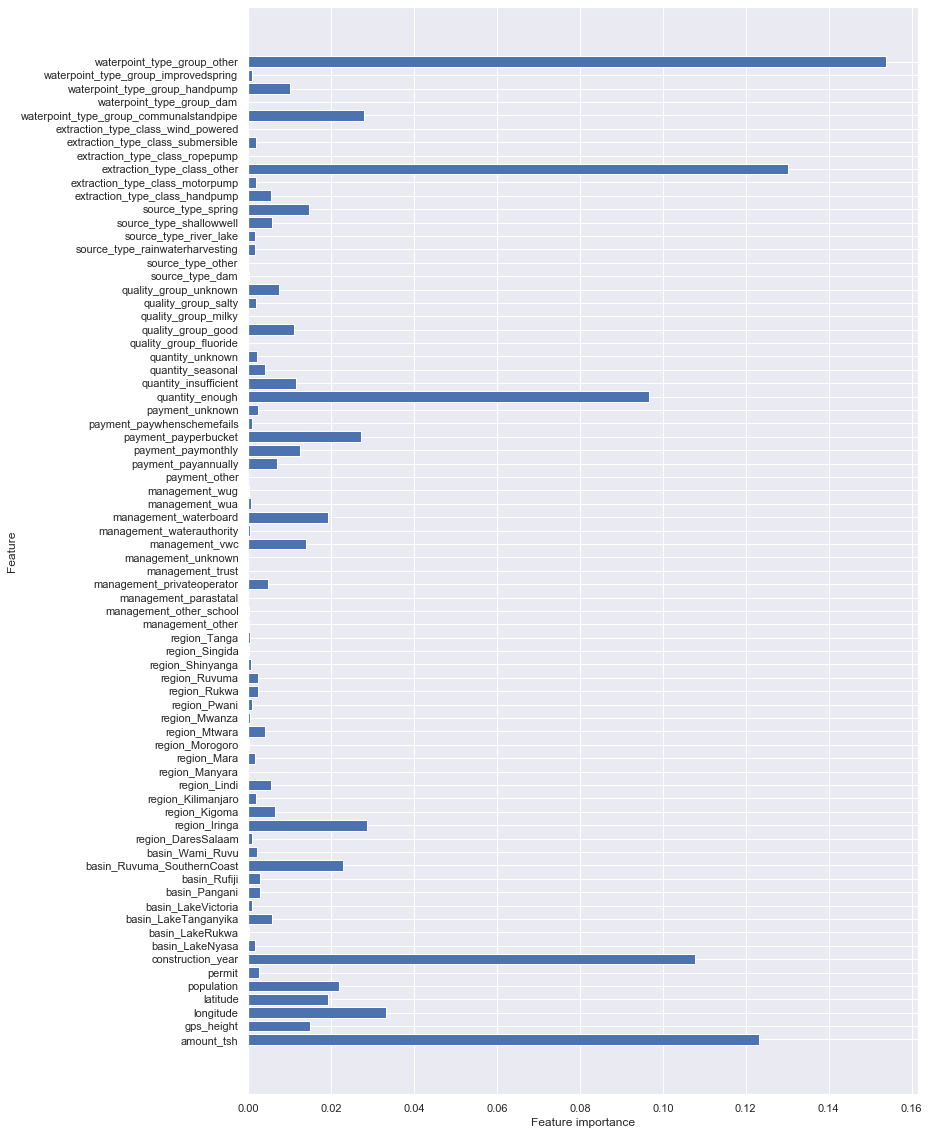

In [142]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(12,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(forest)

#### Observations on the feature importance
As I expected, the variables having to do with the physical and age aspects of the waterpoints seem to have the most feature importance. Interesting that the "other" class for "extraction type" and "waterpoint type" contribute more than the other specific classes for those variables. 

In [148]:
for name, importance in zip(X_train.columns, forest.feature_importances_):
     print(name, "=", importance)

amount_tsh = 0.14698798027730928
gps_height = 0.025000523957032564
longitude = 0.036750831054639894
latitude = 0.022784799461847097
population = 0.016997843628938983
permit = 0.0020652542182350037
construction_year = 0.12219287847802392
basin_LakeNyasa = 0.00043779093758432417
basin_LakeRukwa = 0.00020580917902479818
basin_LakeTanganyika = 0.005251841284786915
basin_LakeVictoria = 0.0026967705127777936
basin_Pangani = 0.002764185878873358
basin_Rufiji = 0.002155996737479645
basin_Ruvuma_SouthernCoast = 0.009113837938560056
basin_Wami_Ruvu = 7.711765906412524e-05
region_DaresSalaam = 2.295126794231766e-05
region_Iringa = 0.0220127686795321
region_Kigoma = 0.005670791262414507
region_Kilimanjaro = 0.0014328703893705006
region_Lindi = 0.002737290565562061
region_Manyara = 3.062705298084199e-05
region_Mara = 0.000368157599831821
region_Morogoro = 0.000363800500171341
region_Mtwara = 0.007893521175988938
region_Mwanza = 0.0009131974660640881
region_Pwani = 0.0006870724585556245
region_Rukwa

In [149]:
# Alternative method for listing feature importances
# (for a long list like this a table is easier to read than a chart)

importance = pd.DataFrame(data={'features': X_train.columns, 'importance': forest.feature_importances_})
importance = importance.sort_values('importance', ascending=False)
importance = importance.reset_index()
importance.drop('index', axis=1, inplace=True)
importance.head(10)

,features,importance
0,waterpoint_type_group_other,0.172629
1,amount_tsh,0.146988
2,construction_year,0.122193
3,extraction_type_class_other,0.116466
4,quantity_enough,0.099195
5,longitude,0.036751
6,waterpoint_type_group_communalstandpipe,0.028629
7,gps_height,0.025001
8,latitude,0.022785
9,payment_payperbucket,0.022482


### Model 2B: Random Forest w/ SMOTE to address class imbalance

In [150]:
# Instantiate and fit a RandomForestClassifier
forest_res = RandomForestClassifier(n_estimators=100, max_depth= 4)
# Fit the classifier
forest_res.fit(X_train_resb, y_train_resb)

RandomForestClassifier(max_depth=4)

In [151]:
# Make predictions for test data
# y_pred = clf_res.predict(scaled_test)

# Predict on training and test sets
training_preds = forest_res.predict(X_train_resb)
test_preds = forest_res.predict(X_test)

In [152]:
# Get results
training_accuracy = accuracy_score(y_train_resb, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Test Accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 65.52%
Test Accuracy: 65.88%


In [153]:
# Get detailed results (Train and Test)

# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TRAIN')
print('--------------------------------------------------------------------------')
print(classification_report(y_train_resb, training_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TRAIN')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_train_resb, training_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('\n--------------------------------------------------------------------------')
# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TEST')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, test_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TEST')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Classification Report - TRAIN
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.76      0.69     14587
           1       0.66      0.56      0.61     14587
           2       0.69      0.64      0.67     14587

    accuracy                           0.66     43761
   macro avg       0.66      0.66      0.65     43761
weighted avg       0.66      0.66      0.65     43761

--------------------------------------------------------------------------
Confusion Matrix - TRAIN
--------------------------------------------------------------------------
Predicted      0      1      2    All
True                                 
0          11102   1776   1709  14587
1           3896   8202   2489  14587
2           2829   2391   9367  14587
All        17827  12369  13565  43761

-----------------------------------

### Observations on Random Forest with SMOTE
Suprisingly accuracy actually decreased slightly (from 69% to 66%). No overfitting was present here as both train and test had the same accuracy value (66%). We do see an increase in recall for class 1 with a score of 0.57 (up from 0.45 without SMOTE). Class 2 is now being calculated as well due to the additional training data.

In [ ]:
# Time to try some tuning. Attempt 1.

In [156]:
# Create the parameter grid dictionary (keep it small)
forest2_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 3, 4, 5, 6]
}

In [ ]:
# Example parameters:
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#                        max_depth=4, max_features='auto', max_leaf_nodes=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=2,
#                        min_weight_fraction_leaf=0.0, n_estimators=100,
#                        n_jobs=None, oob_score=False, random_state=None,
#                        verbose=0, warm_start=False)

In [158]:
# Instantiate GridSearchCV
forest2_grid_search = GridSearchCV(forest_res, forest2_param_grid, cv=3, return_train_score=True)

# Fit to the data
forest2_grid_search.fit(X_train_resb, y_train_resb)

GridSearchCV(cv=3, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [159]:
# Mean training score
forest2_training_score = np.mean(forest2_grid_search.cv_results_['mean_train_score'])

# Mean test score
forest2_testing_score = forest2_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {forest2_training_score :.2%}")
print(f"Mean Test Score: {forest2_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
forest2_grid_search.best_params_

Mean Training Score: 66.66%
Mean Test Score: 67.63%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [160]:
training_preds = forest2_grid_search.predict(X_train_resb)
test_preds = forest2_grid_search.predict(X_test)
training_accuracy = accuracy_score(y_train_resb, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))


Training Accuracy: 69.61%
Validation accuracy: 67.63%


In [161]:
# Get detailed results (Train and Test)

# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TRAIN')
print('--------------------------------------------------------------------------')
print(classification_report(y_train_resb, training_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TRAIN')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_train_resb, training_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('\n--------------------------------------------------------------------------')
# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TEST')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, test_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TEST')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Classification Report - TRAIN
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.75      0.72     14587
           1       0.71      0.60      0.65     14587
           2       0.70      0.73      0.72     14587

    accuracy                           0.70     43761
   macro avg       0.70      0.70      0.69     43761
weighted avg       0.70      0.70      0.69     43761

--------------------------------------------------------------------------
Confusion Matrix - TRAIN
--------------------------------------------------------------------------
Predicted      0      1      2    All
True                                 
0          10997   1631   1959  14587
1           3246   8781   2560  14587
2           1893   2010  10684  14587
All        16136  12422  15203  43761

-----------------------------------

In [ ]:
# Time to try some tuning. Attempt 2.


In [162]:
# Create the parameter grid dictionary (keep it small)
forest3_param_grid = {
    'max_features': [3, 4],
    'n_estimators': [100, 200],
    'max_depth': [6, 10, 12],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [3, 6, 9]
}

In [163]:
# Instantiate GridSearchCV
forest3_grid_search = GridSearchCV(forest_res, forest3_param_grid, cv=3, return_train_score=True)

# Fit to the data
forest3_grid_search.fit(X_train_resb, y_train_resb)

GridSearchCV(cv=3, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_depth': [6, 10, 12], 'max_features': [3, 4],
                         'min_samples_leaf': [3, 6, 9],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             return_train_score=True)

In [164]:
# Mean training score
forest3_training_score = np.mean(forest3_grid_search.cv_results_['mean_train_score'])

# Mean test score
forest3_testing_score = forest3_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {forest3_training_score :.2%}")
print(f"Mean Test Score: {forest3_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
forest3_grid_search.best_params_

Mean Training Score: 74.02%
Mean Test Score: 72.82%
Best Parameter Combination Found During Grid Search:


{'max_depth': 12,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [165]:
training_preds = forest3_grid_search.predict(X_train_resb)
test_preds = forest3_grid_search.predict(X_test)
training_accuracy = accuracy_score(y_train_resb, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation Accuracy: {:.4}%'.format(test_accuracy * 100))


Training Accuracy: 78.78%
Validation accuracy: 72.82%


In [166]:
# Get detailed results (Train and Test)

# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TRAIN')
print('--------------------------------------------------------------------------')
print(classification_report(y_train_resb, training_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TRAIN')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_train_resb, training_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('\n--------------------------------------------------------------------------')
# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TEST')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, test_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TEST')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Classification Report - TRAIN
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.82      0.79     14587
           1       0.83      0.67      0.74     14587
           2       0.77      0.88      0.82     14587

    accuracy                           0.79     43761
   macro avg       0.79      0.79      0.79     43761
weighted avg       0.79      0.79      0.79     43761

--------------------------------------------------------------------------
Confusion Matrix - TRAIN
--------------------------------------------------------------------------
Predicted      0      1      2    All
True                                 
0          11928   1194   1465  14587
1           2510   9751   2326  14587
2            988    801  12798  14587
All        15426  11746  16589  43761

-----------------------------------

### Observations on Model 2c/d: hyperparameter tuning
The first attempt at tuning did not improve things much, raised accuracy from 66% to 68%, but there was also a 5% increase in Reall (from 0.57 to 0.62). In the second round of tuning, we got similar increases: Accuracy increased to 73% and accuracy for Class 1 is now at 0.67. Even though some of the parameters have high values (max_depth = 12) there is just a small amount of overtraining (accuracy of 79% in train vs 73% in test). 

In [169]:
# Check to see if the fature importances have changed based on this... 
importance = pd.DataFrame(data={'features': X_train.columns, 'importance': forest_res.feature_importances_})
importance = importance.sort_values('importance', ascending=False)
importance = importance.reset_index()
importance.drop('index', axis=1, inplace=True)
importance.head(20)

,features,importance
0,longitude,0.093176
1,extraction_type_class_other,0.092843
2,quantity_enough,0.090329
3,amount_tsh,0.077557
4,construction_year,0.068471
5,waterpoint_type_group_other,0.067367
6,payment_payperbucket,0.046646
7,region_Kigoma,0.041513
8,extraction_type_class_handpump,0.040956
9,region_Iringa,0.036314


### Observations on the feature importance.
#Interesting that longitude has risen to the top of the list. The rest seem very similar to the previous run. Not clear if this is taking into account the tuning parameters. Since I had to put in the original model name, I am guessing not. Also, is this based on the training data or test data? If training then it is utilizing the SMOTE data, which would account for some of the observed changes here.  

### Model 3: Decision Trees


In [170]:
# Loading relevant libraries and packages
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

import sklearn.datasets as datasets
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [171]:
# Train a DT classifier
ctree = DecisionTreeClassifier(max_depth=3, random_state=10)  
ctree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

In [172]:
# Make predictions for test data
y_pred = ctree.predict(X_test)

# Predict on training and test sets
training_preds = ctree.predict(X_train)
test_preds = ctree.predict(X_test)

In [173]:
# Get results
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Test Accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 67.87%
Test Accuracy: 67.75%


In [175]:
# Get detailed results (Train and Test)

# Classification Report
print('--------------------------------------------------------------------------')
print('MODEL - Decision Trees')
print('Classification Report - TRAIN')
print('--------------------------------------------------------------------------')
print(classification_report(y_train, training_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TRAIN')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_train, training_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('\n--------------------------------------------------------------------------')
# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TEST')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, test_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TEST')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
MODEL - Decision Trees
Classification Report - TRAIN
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.86      0.76     14587
           1       0.68      0.54      0.60     10086
           2       0.00      0.00      0.00      1804

    accuracy                           0.68     26477
   macro avg       0.45      0.47      0.45     26477
weighted avg       0.63      0.68      0.65     26477

--------------------------------------------------------------------------
Confusion Matrix - TRAIN
--------------------------------------------------------------------------
Predicted      0     1    All
True                         
0          12497  2090  14587
1           4614  5472  10086
2           1297   507   1804
All        18408  8069  26477

------------------------------------------------------------

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### OBSERVATIONS on Model 3: Decision Trees
About same accuracy as initial Random Forest model. No overfitting occured as train and test accuracy were both at 68%. For class 1, recall was slightly better than Random Forest at 0.55... but that may not be accurate as theere was an issue again with class 2. In the confusion matrix we can see that there are a large number of false negatives for the 0 class (1541).
QUESTION: Why did both the confusion matrix and the Classification report have issues with Class 2? See the warning and lack of values and metrics for class 2? This is likely due to the class imbalnce. 

### Model 3B: Decision Trees w/ SMOTE to address class imbalance

In [189]:
# Instantiate and fit a RandomForestClassifier
ctree_res = DecisionTreeClassifier(max_depth=6, random_state=10) 
# Fit the classifier
ctree_res.fit(X_train_resb, y_train_resb)

DecisionTreeClassifier(max_depth=6, random_state=10)

In [190]:
# Predict on training and test sets
training_preds = ctree_res.predict(X_train_resb)
test_preds = ctree_res.predict(X_test)

In [191]:
# Get results
training_accuracy = accuracy_score(y_train_resb, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Test Accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 63.33%
Test Accuracy: 68.09%


In [192]:
# Get detailed results (Train and Test)

# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TRAIN')
print('--------------------------------------------------------------------------')
print(classification_report(y_train_resb, training_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TRAIN')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_train_resb, training_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('\n--------------------------------------------------------------------------')
# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TEST')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, test_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TEST')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Classification Report - TRAIN
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.75      0.67     14587
           1       0.60      0.65      0.62     14587
           2       0.72      0.50      0.59     14587

    accuracy                           0.63     43761
   macro avg       0.65      0.63      0.63     43761
weighted avg       0.65      0.63      0.63     43761

--------------------------------------------------------------------------
Confusion Matrix - TRAIN
--------------------------------------------------------------------------
Predicted      0      1      2    All
True                                 
0          10928   2527   1132  14587
1           3442   9485   1660  14587
2           3531   3755   7301  14587
All        17901  15767  10093  43761

-----------------------------------

### Observations on the SMOTE results
Interesting that the accuracy dropped quite a bit (from test = 68% to 60%) and that test here was actually higher than train accuracy (train = 55%, test = 60%). The recall of class 1 went up slightly (from 0.55 to 0.59). 

Exploring a few tweaks to max_depth...
max_depth=6 > Accuracy: Train=63% , Test=68%
max_depth=12 > Accuracy: Train=78% , Test=71%
max_depth=15 > Accuracy: Train=86% , Test=72%
So can see that overtraining is happening once max_depth increases beyong about 10. Will try plotting decison tree with max_depth=6 to see how that looks. 

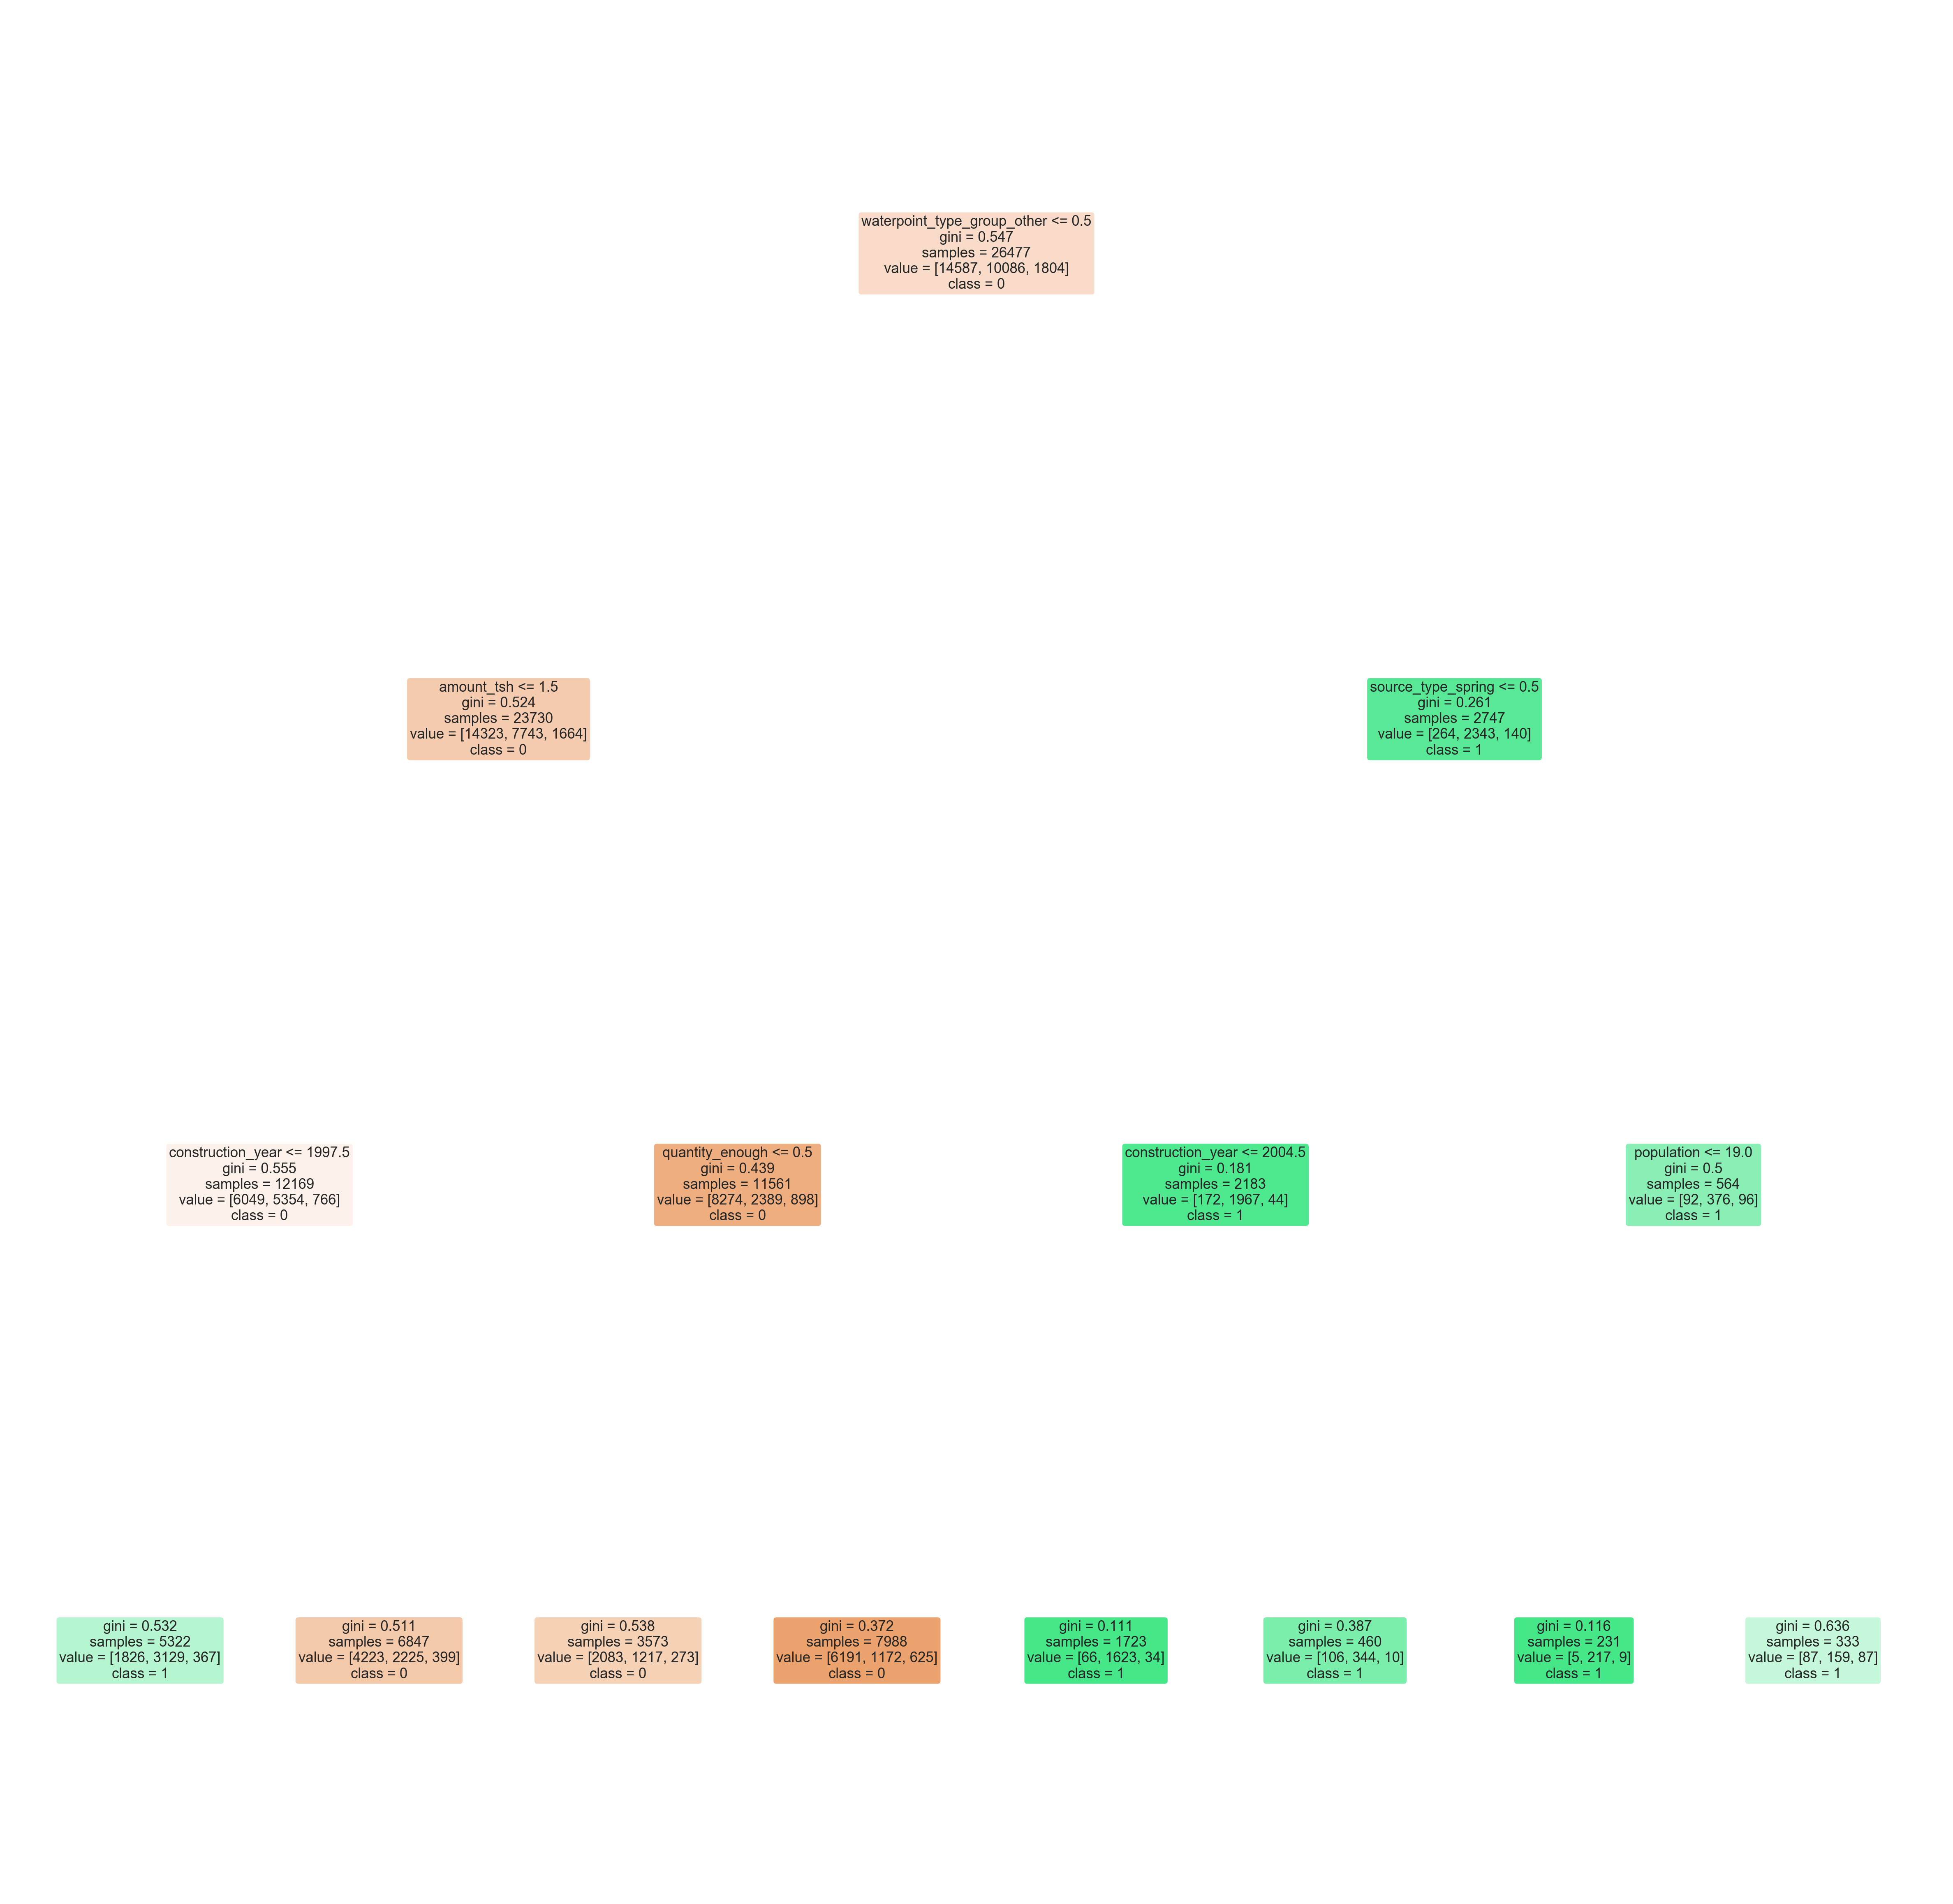

In [194]:
# Plot and show decision tree
plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(ctree, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()
# NOTE: tried the 6 deep tree and way too small to view. Going to use earlier tree (prior to SMOTE)

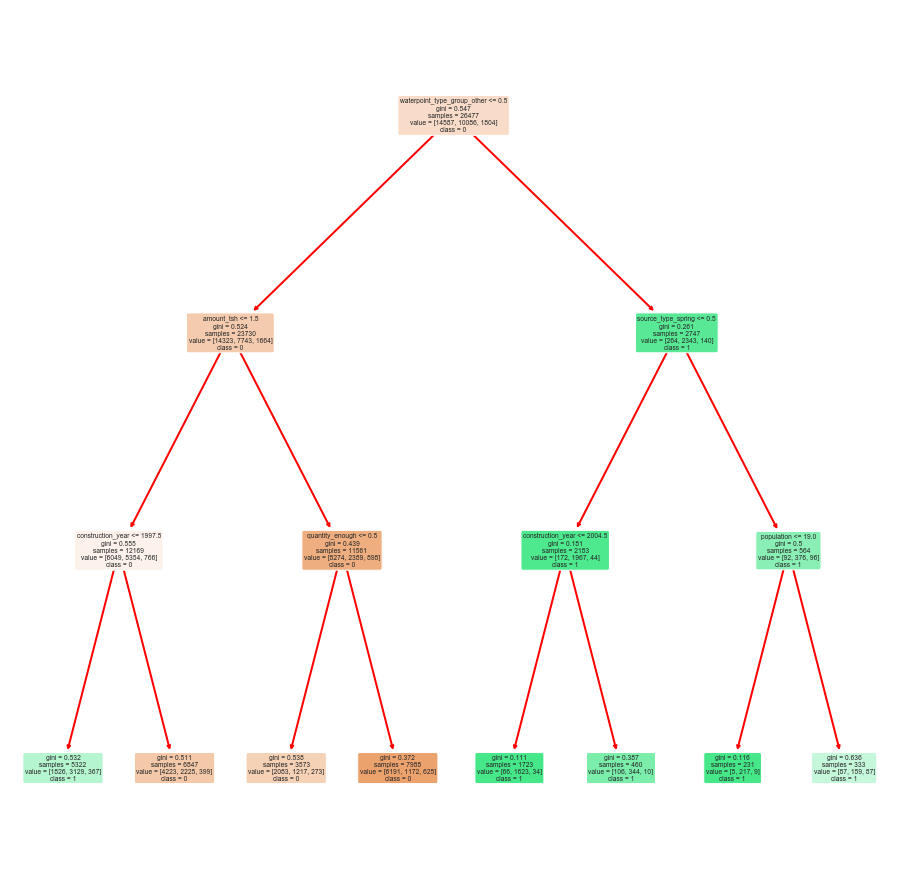

In [198]:
# Try tweaking the code... 
fig, ax = plt.subplots(figsize=(16,16))
out = tree.plot_tree(ctree, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(2)

In [200]:
fig.savefig("decistion_tree_3deep.png")

In [202]:
import graphviz

In [323]:
# Alternative method for plotting decision tree - graphviz (could not get this to work)

# DOT data
# dot_data = tree.export_graphviz(ctree, out_file=None, 
#                                 feature_names=X.columns,  
#                                 class_names=np.unique(y).astype('str'),
#                                 filled=True)

# Draw graph
# graph = graphviz.Source(dot_data, format="png") 
# graph

In [204]:
# Tree text representation for vanilla model = 3 deep
text_representation = tree.export_text(ctree)
print(text_representation)

|--- feature_73 <= 0.50
|   |--- feature_0 <= 1.50
|   |   |--- feature_6 <= 1997.50
|   |   |   |--- class: 1
|   |   |--- feature_6 >  1997.50
|   |   |   |--- class: 0
|   |--- feature_0 >  1.50
|   |   |--- feature_48 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_48 >  0.50
|   |   |   |--- class: 0
|--- feature_73 >  0.50
|   |--- feature_62 <= 0.50
|   |   |--- feature_6 <= 2004.50
|   |   |   |--- class: 1
|   |   |--- feature_6 >  2004.50
|   |   |   |--- class: 1
|   |--- feature_62 >  0.50
|   |   |--- feature_4 <= 19.00
|   |   |   |--- class: 1
|   |   |--- feature_4 >  19.00
|   |   |   |--- class: 1



In [207]:
# Tree text representation for the SMOTE model - 6 deep
text_representation = tree.export_text(ctree_res)
print(text_representation)

|--- feature_73 <= 0.50
|   |--- feature_2 <= 34.18
|   |   |--- feature_71 <= 0.50
|   |   |   |--- feature_21 <= 0.50
|   |   |   |   |--- feature_26 <= 0.50
|   |   |   |   |   |--- feature_47 <= 0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_47 >  0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_26 >  0.50
|   |   |   |   |   |--- feature_0 <= 27.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  27.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |--- feature_21 >  0.50
|   |   |   |   |--- feature_33 <= 0.50
|   |   |   |   |   |--- feature_4 <= 743.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_4 >  743.00
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_33 >  0.50
|   |   |   |   |   |--- feature_6 <= 1996.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_6 >  1996.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_7

[0.6294653265331829, 0.6266040725488449, 0.6721244212531178, 0.7024056615505081, 0.7158598267229228, 0.7206185842433228, 0.7322890818112018, 0.7410421736092224, 0.7533356198398161, 0.7586889171827352, 0.7613799507879622, 0.7668470279025996, 0.7686314175618139, 0.7703025409104146, 0.7692261740007365, 0.7699627419785744, 0.7690278897631099, 0.7694530034666647, 0.7671300412453678]


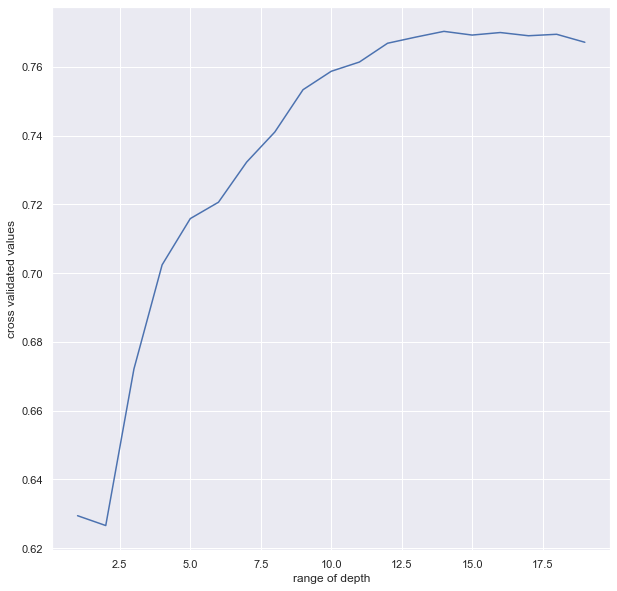

In [208]:
# cross validation to test tree depth values...vanilla model
score = cross_val_score(ctree, X, y, cv = 10)
score.mean()
depth_range = range(1,20)
val = []
for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(ctree, X, y, cv = 10)
    val.append(depth_score.mean())
print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('range of depth')
plt.ylabel('cross validated values')
plt.show()

In [215]:
# Instantiate and fit a RandomForestClassifier
ctree_res13 = DecisionTreeClassifier(max_depth=13, random_state=10) 
# Fit the classifier
ctree_res13.fit(X_train_resb, y_train_resb)

DecisionTreeClassifier(max_depth=13, random_state=10)

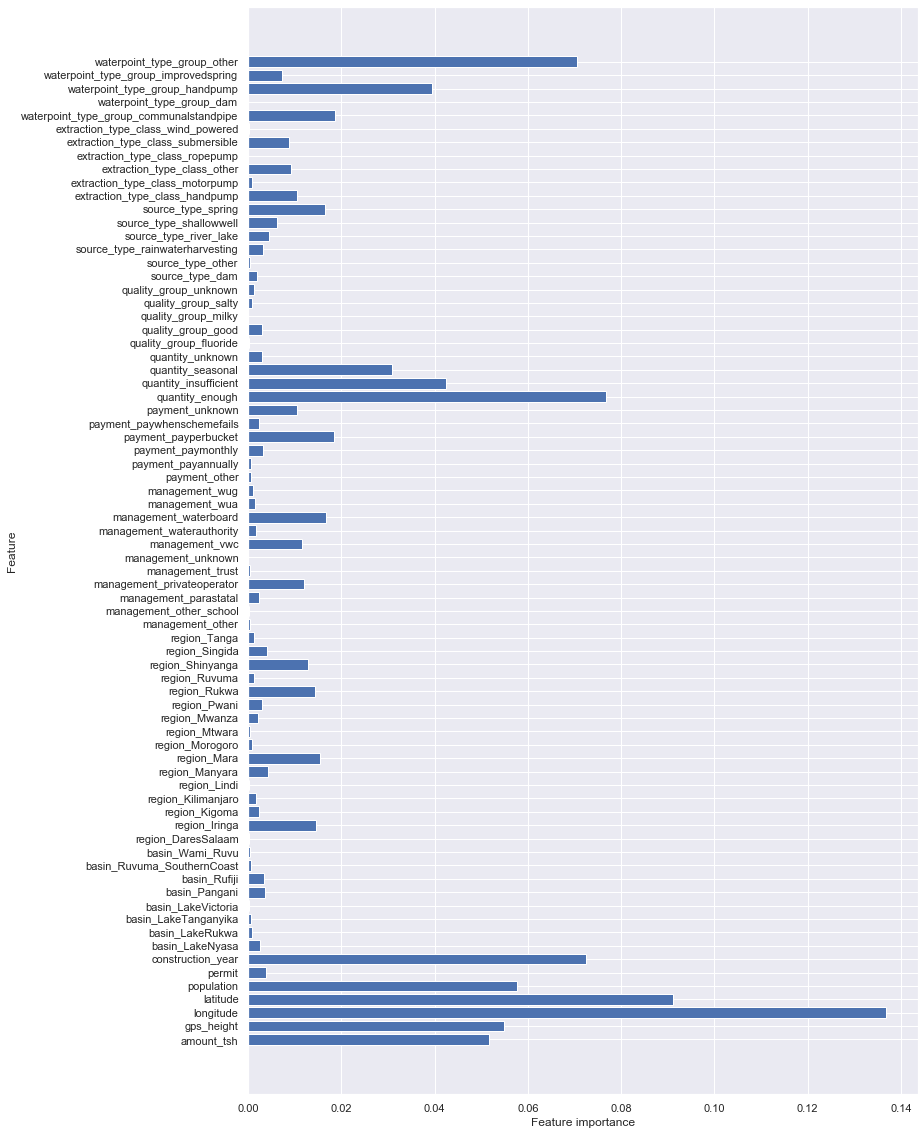

In [216]:
# Plot the feature importance based on the SMOTE model (with max_depth=13)
def plot_feature_importances(model):
    n_features = X_train_resb.shape[1]
    plt.figure(figsize=(12,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_resb.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(ctree_res13)

In [217]:
# Alternative method for listing feature importances

importance = pd.DataFrame(data={'features': X_train_resb.columns, 'importance': ctree_res13.feature_importances_})
importance = importance.sort_values('importance', ascending=False)
importance = importance.reset_index()
importance.drop('index', axis=1, inplace=True)
importance.head(20)

,features,importance
0,longitude,0.136785
1,latitude,0.091125
2,quantity_enough,0.076725
3,construction_year,0.072496
4,waterpoint_type_group_other,0.070551
5,population,0.057745
6,gps_height,0.054895
7,amount_tsh,0.051625
8,quantity_insufficient,0.042520
9,waterpoint_type_group_handpump,0.039410


### Observations on feature importances
For the 6-deep tree we see 3 top features (each at about 0.15): quantity-enough, waterpoint_type_other, and longitude. Looking at the rest of the top 10 features and they all have to do with location, type of waterpoint, quantity of water, and construction year. When the depth of the trees is increased to 13 (noted as an optimal value earlier) the values of the features changes slightly, and some of the features shift in importance but the top 10 is motly the same items (features).

In [218]:
# Running the model with max_depth = 13
# Predict on training and test sets
training_preds = ctree_res13.predict(X_train_resb)
test_preds = ctree_res13.predict(X_test)

In [219]:
# Get results
training_accuracy = accuracy_score(y_train_resb, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Test Accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 80.82%
Test Accuracy: 72.31%


In [220]:
# Get detailed results (Train and Test)

# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TRAIN')
print('--------------------------------------------------------------------------')
print(classification_report(y_train_resb, training_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TRAIN')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_train_resb, training_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('\n--------------------------------------------------------------------------')
# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TEST')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, test_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TEST')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Classification Report - TRAIN
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.86      0.82     14587
           1       0.84      0.73      0.78     14587
           2       0.81      0.84      0.82     14587

    accuracy                           0.81     43761
   macro avg       0.81      0.81      0.81     43761
weighted avg       0.81      0.81      0.81     43761

--------------------------------------------------------------------------
Confusion Matrix - TRAIN
--------------------------------------------------------------------------
Predicted      0      1      2    All
True                                 
0          12522   1075    990  14587
1           2132  10656   1799  14587
2           1442    957  12188  14587
All        16096  12688  14977  43761

-----------------------------------

### Observations on the SMOTE model that is 13 deep.
We see some overfitting (train accuracy of 81% and test of 72%). The increase in accuracy is not much over 6 deep which was 68%. Recall for class 1 is also not much improved, now at 0.68. 

### Model 4: KNN
This is likely to be a poorer performing model but should have some interpretability.
It requires Scaling to ensure the data values are of the same magnitude. Especially for continuous variables.

In [221]:
# Normalizing the data with the standard scaler
from sklearn.preprocessing import StandardScaler

In [222]:
# Instantiate the scaler
scaler = StandardScaler()

In [223]:
# Transform the training and test sets
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)

In [224]:
# Convert into a df ? Not sure if this step is necessary?
scaled_df_train = pd.DataFrame(scaled_train, columns=X.columns)
scaled_df_train.head()

,amount_tsh,gps_height,longitude,latitude,population,permit,construction_year,basin_LakeNyasa,basin_LakeRukwa,basin_LakeTanganyika,basin_LakeVictoria,basin_Pangani,basin_Rufiji,basin_Ruvuma_SouthernCoast,basin_Wami_Ruvu,region_DaresSalaam,region_Iringa,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tanga,management_other,management_other_school,management_parastatal,management_privateoperator,management_trust,management_unknown,management_vwc,management_waterauthority,management_waterboard,management_wua,management_wug,payment_other,payment_payannually,payment_paymonthly,payment_payperbucket,payment_paywhenschemefails,payment_unknown,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,source_type_dam,source_type_other,source_type_rainwaterharvesting,source_type_river_lake,source_type_shallowwell,source_type_spring,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_ropepump,extraction_type_class_submersible,extraction_type_class_wind_powered,waterpoint_type_group_communalstandpipe,waterpoint_type_group_dam,waterpoint_type_group_handpump,waterpoint_type_group_improvedspring,waterpoint_type_group_other
0,-0.363296,-1.177887,1.127205,-1.302176,0.553928,0.628954,-1.773446,-0.231881,-0.165996,-0.335658,-0.256379,-0.556919,-0.459151,2.739082,-0.398601,-0.15136,-0.358544,-0.291758,-0.369457,4.738325,-0.217028,-0.217314,-0.35747,-0.226312,-0.103384,-0.277570,-0.228150,-0.251322,-0.070784,-0.178323,-0.262021,-0.109729,-0.055051,-0.168975,-0.211533,-0.048837,-0.099585,-1.453402,-0.12803,-0.285617,4.125994,-0.250727,-0.099198,-0.262186,-0.482739,-0.485770,-0.244715,-0.385004,0.841739,-0.610449,-0.229703,-0.111825,-0.066048,0.390675,-0.063998,-0.327094,-0.14753,-0.083425,-0.07369,-0.171792,-0.527288,-0.504281,1.445510,-0.512987,-0.191646,-0.330831,-0.088768,-0.389519,-0.037408,0.724567,-0.012292,-0.544571,-0.10093,-0.340236
1,-0.363296,-1.242854,0.943089,-1.809045,-0.422070,0.628954,0.891128,-0.231881,-0.165996,-0.335658,-0.256379,-0.556919,-0.459151,2.739082,-0.398601,-0.15136,-0.358544,-0.291758,-0.369457,-0.211045,-0.217028,-0.217314,-0.35747,4.418688,-0.103384,-0.277570,-0.228150,-0.251322,-0.070784,-0.178323,-0.262021,-0.109729,-0.055051,-0.168975,-0.211533,-0.048837,-0.099585,0.688041,-0.12803,-0.285617,-0.242366,-0.250727,-0.099198,-0.262186,-0.482739,-0.485770,-0.244715,-0.385004,-1.188017,-0.610449,4.353450,-0.111825,-0.066048,-2.559670,-0.063998,3.057224,-0.14753,-0.083425,-0.07369,-0.171792,-0.527288,1.983022,-0.691798,1.949368,-0.191646,-0.330831,-0.088768,-0.389519,-0.037408,-1.380135,-0.012292,1.836308,-0.10093,-0.340236
2,-0.298203,-1.327311,1.077234,-0.533018,-0.663528,0.628954,0.810383,-0.231881,-0.165996,-0.335658,-0.256379,-0.556919,2.177931,-0.365086,-0.398601,-0.15136,-0.358544,-0.291758,-0.369457,-0.211045,-0.217028,-0.217314,-0.35747,-0.226312,-0.103384,3.602695,-0.228150,-0.251322,-0.070784,-0.178323,-0.262021,-0.109729,-0.055051,-0.168975,4.727401,-0.048837,-0.099585,-1.453402,-0.12803,-0.285617,-0.242366,-0.250727,-0.099198,-0.262186,-0.482739,2.058588,-0.244715,-0.385004,-1.188017,1.638139,-0.229703,-0.111825,-0.066048,0.390675,-0.063998,-0.327094,-0.14753,-0.083425,-0.07369,-0.171792,-0.527288,1.983022,-0.691798,1.949368,-0.191646,-0.330831,-0.088768,-0.389519,-0.037408,-1.380135,-0.012292,1.836308,-0.10093,-0.340236
3,-0.363296,-0.299208,-1.978509,-0.617467,-0.663528,-1.589942,-1.046744,-0.231881,-0.165996,2.979227,-0.256379,-0.556919,-0.459151,-0.365086,-0.398601,-0.15136,-0.358544,-0.291758,-0.369457,-0.211045,-0.217028,-0.217314,-0.35747,-0.226312,-0.103384,-0.277570,4.383087,-0.251322,-0.070784,-0.178323,-0.262021,-0.109729,-0.055051,-0.168975,-0.211533,-0.048837,-0.099585,0.68

In [225]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [226]:
# Instantiate KNeighborsClassifier
clfK = KNeighborsClassifier()

# Fit the classifier
clfK.fit(scaled_df_train, y_train)

KNeighborsClassifier()

In [227]:
# Make predictions for test data
# y_pred = clfK.predict(scaled_test)

# Predict on training and test sets
training_preds = clfK.predict(scaled_df_train)
test_preds = clfK.predict(scaled_test)

In [228]:
# Get results
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Test Accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 82.87%
Test Accuracy: 76.32%


In [229]:
# Get detailed results (Train and Test)

# Classification Report
print('--------------------------------------------------------------------------')
print('MODEL - KNN')
print('Classification Report - TRAIN')
print('--------------------------------------------------------------------------')
print(classification_report(y_train, training_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TRAIN')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_train, training_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('\n--------------------------------------------------------------------------')
# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TEST')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, test_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TEST')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
MODEL - KNN
Classification Report - TRAIN
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     14587
           1       0.85      0.79      0.82     10086
           2       0.71      0.35      0.47      1804

    accuracy                           0.83     26477
   macro avg       0.79      0.69      0.72     26477
weighted avg       0.83      0.83      0.82     26477

--------------------------------------------------------------------------
Confusion Matrix - TRAIN
--------------------------------------------------------------------------
Predicted      0     1    2    All
True                              
0          13299  1104  184  14587
1           2000  8007   79  10086
2            903   265  636   1804
All        16202  9376  899  26477

-----------------------------------------

### OBSERVATIONS on Model 4: KNN - plain version
Suprisingly high score on train accuracy of 83%, but some overfitting as test accuracy is at 76%. For class 1, recall was reasonably at 0.72. But in the confusion matrix we can see that there are a large number of false negatives for the 0 class (888) and 50 in the 2 class. 

In [248]:
# Find best value of K
# Back to approach from the lesson

def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))


In [324]:
# This did not work here...
# find_best_k(scaled_df_train, y_train, scaled_test, y_test)

### Model 4B: KNN with SMOTE

#### SMOTE Set-up

In [109]:
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE

In [110]:
# Try and address the target class imbalance with SMOTE

print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train == 2)))

sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(scaled_df_train, y_train) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))

Before OverSampling, counts of label '0': 14587
Before OverSampling, counts of label '1': 10086 

Before OverSampling, counts of label '2': 1804
After OverSampling, the shape of train_X: (43761, 74)
After OverSampling, the shape of train_y: (43761,) 

After OverSampling, counts of label '0': 14587
After OverSampling, counts of label '1': 14587
After OverSampling, counts of label '2': 14587


In [230]:
# Instantiate KNeighborsClassifier
clfK_res = KNeighborsClassifier()

# Fit the classifier
clfK_res.fit(X_train_res, y_train_res)

KNeighborsClassifier()

In [231]:
# Make predictions for test data
# y_pred = clfK_res.predict(scaled_test)

# Predict on training and test sets
training_preds = clfK_res.predict(X_train_res)
test_preds = clfK_res.predict(scaled_test)

In [232]:
# Get results
training_accuracy = accuracy_score(y_train_res, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Test Accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 87.64%
Test Accuracy: 72.0%


In [233]:
# Get detailed results (Train and Test)

# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TRAIN')
print('--------------------------------------------------------------------------')
print(classification_report(y_train_res, training_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TRAIN')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_train_res, training_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('\n--------------------------------------------------------------------------')
# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TEST')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, test_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TEST')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Classification Report - TRAIN
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.81      0.83     14587
           1       0.88      0.86      0.87     14587
           2       0.89      0.96      0.92     14587

    accuracy                           0.88     43761
   macro avg       0.88      0.88      0.88     43761
weighted avg       0.88      0.88      0.88     43761

--------------------------------------------------------------------------
Confusion Matrix - TRAIN
--------------------------------------------------------------------------
Predicted      0      1      2    All
True                                 
0          11833   1513   1241  14587
1           1525  12511    551  14587
2            398    181  14008  14587
All        13756  14205  15800  43761

-----------------------------------

### OBSERVATIONS on Model 4B: KNN with SMOTE¶
With SMOTE the training accuracy increased (from 83% to 88%), but test accuracy decreased some (from 76% to 72%). This indicates there was some overfitting which is to be expected with this approach. For class 1, recall improved slightly with SMOTE (from 72% to 75%). But still we see in the confusion matrix we can see that there are a large number of false negatives for the 0 class (620) and 2 class (237), but this is fewer than without SMOTE, so that is good.

### Tuning of the KNN model
One of the key parameters for KNN is the value for K. So we will start by trying to determine this. 

In [239]:
# Import the necessary functions
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [243]:
# Find the best value for k
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [325]:
# find_best_k(scaled_df_train, y_train, scaled_test, y_test)

In [242]:
# DIDNT work with my edits
# Find the best value for k
def find_best_k(X_train_res, y_train_res, scaled_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_res, y_train_res)
        preds = knn.predict(scaled_test)
        Accuracy = accuracy_score(y_test, scaled_test)
        if f1 > best_score:
            best_k = k
            best_score = Accuracy
    
print("Best Value for k: {}".format(best_k))
print("Accuracy-Score: {}".format(best_score))

NameError: name 'best_k' is not defined

In [326]:
# find_best_k(X_train_res, y_train_res, scaled_test, y_test)

Minimum error:- 0.24813052345343303 at K = 1


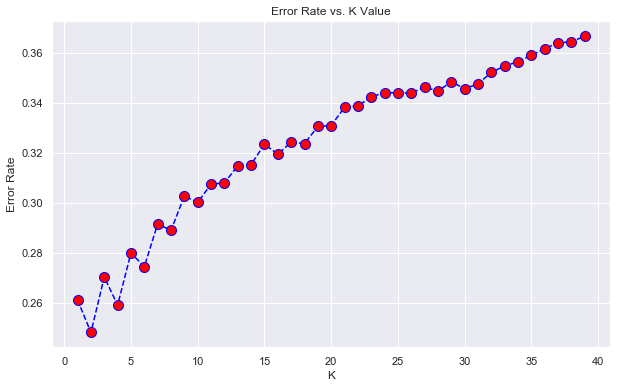

In [245]:
# Another approach to finding optimal K? Based on minimizing the error_rate

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_res,y_train_res)
 pred_i = knn.predict(scaled_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.751869476546567 at K = 1


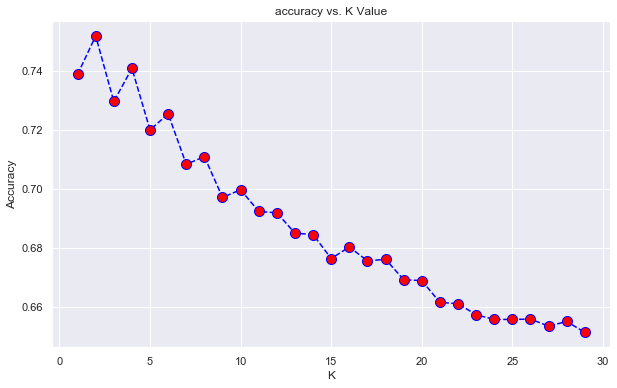

In [247]:
# Try this another way... 
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train_res,y_train_res)
    yhat = neigh.predict(scaled_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [250]:
# Grid Search from an article 
#define the model and parameters 
knn = KNeighborsClassifier()

parameters = {'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}

#Fit the model
model = GridSearchCV(knn, param_grid=parameters)
model.fit(train_X,train_y)

#predictions on test data
prediction=model.predict(test_X)

NameError: name 'train_X' is not defined

In [251]:
# More parameters to try? Grid Search?
# Create the parameter grid dictionary (keep it small)
knn_param_grid = {'n_neighbors':[3,4,5,6,7],
                  'leaf_size':[1,3,5,7],
                  'algorithm':['auto', 'kd_tree'],
                  'n_jobs':[-1]}

# Instantiate GridSearchCV
knn_grid_search = GridSearchCV(clfK_res, knn_param_grid, cv=3, return_train_score=True)

# Fit to the data
knn_grid_search.fit(X_train_resb, y_train_resb)

# Mean training score
knn_training_score = np.mean(knn_grid_search.cv_results_['mean_train_score'])

# Mean test score
knn_testing_score = knn_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {knn_training_score :.2%}")
print(f"Mean Test Score: {knn_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
knn_grid_search.best_params_

Mean Training Score: 79.62%
Mean Test Score: 58.21%
Best Parameter Combination Found During Grid Search:


{'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 3}

In [252]:
training_preds = knn_grid_search.predict(X_train_resb)
test_preds = knn_grid_search.predict(X_test)
training_accuracy = accuracy_score(y_train_resb, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation Accuracy: {:.4}%'.format(test_accuracy * 100))


Training Accuracy: 86.24%
Validation Accuracy: 58.21%


In [253]:
# Get detailed results (Train and Test)

# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TRAIN')
print('--------------------------------------------------------------------------')
print(classification_report(y_train_resb, training_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TRAIN')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_train_resb, training_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('\n--------------------------------------------------------------------------')
# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TEST')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, test_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TEST')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Classification Report - TRAIN
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.79      0.82     14587
           1       0.85      0.84      0.85     14587
           2       0.88      0.95      0.91     14587

    accuracy                           0.86     43761
   macro avg       0.86      0.86      0.86     43761
weighted avg       0.86      0.86      0.86     43761

--------------------------------------------------------------------------
Confusion Matrix - TRAIN
--------------------------------------------------------------------------
Predicted      0      1      2    All
True                                 
0          11589   1833   1165  14587
1           1606  12301    680  14587
2            470    266  13851  14587
All        13665  14400  15696  43761

-----------------------------------

#### Observations on GridSearch for KNN model with SMOTE
Intersting that the values coming back are so low.. so a K of 3 was selected as best... and it may even be smaller? (maybe the plots above are not incorrect). Accuracy is poor for test at 58% and recall is also poor at 0.57. Definite overtaraining can be seen with the large value for both train accuracy (86%) and train recall (0.84). 

## APPENDIX

In [ ]:
# Code from the article to run the test: 
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

In [ ]:
# Another version of SMOTE from our lessons: 

# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

In [ ]:
# Find the best value for k
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [ ]:
# For use / comparison to the info above
find_best_k(scaled_df_train, y_train, scaled_test, y_test)

In [ ]:
# To change a column to numeric (was object
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
display(df.info())

In [ ]:
# Drop all duplicates
df.drop_duplicates(keep='first',inplace=True)
# Drop all columns with missing information
df = df.dropna(axis = 0)
# One Hot Encoding with get_dummy variables and drop first
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Replace target values - there are three classes
target = target.replace({'status_group': {'functional' : 1, 
                                'non functional' : 0, 
                                'functional needs repair' : 2}})

In [ ]:
# SMOTE - how to SMOTE?
# only fit_sample on your train to prevent data leakage! typically we don’t SMOTE our test data 
X_train_smoted, y_train_smoted = smote.fit_sample(X_train, y_train)
model.fit(X_train_smoted, y_train_smoted)
y_hat_train = model.predict(X_train)


In [ ]:
# Smote and undersample from article: 

# define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)


# decision tree  on imbalanced dataset with SMOTE oversampling and random undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

In [ ]:
# Potential code to fix decison tree graphic - from stack overflow

from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
fig, ax = plt.subplots(figsize=(10,10))
out = tree.plot_tree(clf)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)


In [ ]:
# To sort the feature importances try this says Yish: 
for name, importance in list(zip(X_train.columns, forest.feature_importances_)).sort(key=lambda x: x[1])
    print(name, "=", f"{importance:.2f}".)

In [ ]:
# Method to viz seperability of data
sklearn.manifold.TSNE

In [ ]:
# How to min max scale just certain columns: 
In [91]: df
Out[91]:
          x         y         z
a -0.325882 -0.299432 -0.182373
b -0.833546 -0.472082  1.158938
c -0.328513 -0.664035  0.789414
d -0.031630 -1.040802 -1.553518
e  0.813328  0.076450  0.022122

In [92]: from sklearn.preprocessing import MinMaxScaler

In [93]: mms = MinMaxScaler()

In [94]: df[['x','z']] = mms.fit_transform(df[['x','z']])
    
# ANOTHER option: 
from sklearn.preprocessing import minmax_scale

df[['x','z']] = minmax_scale(df[['x','z']])

# OR one more...
It might be helpful to some to point out that minmax_scale works on single dataframe columns out of the box,
# where MinMaxScaler seems to require multiple columns. If you wanted to scale only x,
df['x'] = minmax_scale(df['x'])
If your values being scaled aren't float, then
df['x'] = minmax_scale(df['x'].astype(np.float64))
# to avoid a dtype conversion warning. – Julian Drago

In [ ]:
# Approach to getting rid of too many zeros or missing values:
See KNN Imputer

In [ ]:
# Example of normalize just one column
# normalise the amount column 
data['normAmount'] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1, 1)) 


In [ ]:
# EDA - Look at distribution of categorical variables (bar for each variable - 3 accross)

fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

In [ ]:
# EDA - box and wisker plots to see categorical related to sale price...
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='BsmtExposure', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [ ]:
# Functionalizing pieces of the process... one example

# Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, y_pred)